In [1]:
#%% Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

#from google.colab import drive
#drive.mount('/content/drive')

# define filepath and load data and display it
# filepaths for BP_PHQ_9
#file_path_BP_PHQ_9_s1 = '/content/drive/My Drive/Colab Notebooks/sampler_1_Threshold_1_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_100.csv' # sampler = 1
#file_path_BP_PHQ_9_s2 = '/content/drive/My Drive/Colab Notebooks/Threshold_1_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_100_v2.csv' # sampler = 2
#file_path_MH_PHQ_S_s1 = '/content/drive/My Drive/Colab Notebooks/Threshold_8_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_100.csv' # sampler = 1
#file_path_MH_PHQ_S_s2 = '/content/drive/My Drive/Colab Notebooks/Threshold_8_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_100_v2.csv' # sampler = 2

file_path_BP_PHQ_9_s1 = 'sampler_1_Threshold_1_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_100.csv'
file_path_BP_PHQ_9_s2 = 'Threshold_1_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_100_v2.csv'
file_path_MH_PHQ_S_s1 = 'Threshold_8_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_100.csv'
file_path_MH_PHQ_S_s2 = 'Threshold_8_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_100_v2.csv'


# load different datasets
df_BP_PHQ_9_s1 = pd.read_csv(file_path_BP_PHQ_9_s1)
df_BP_PHQ_9_s2 = pd.read_csv(file_path_BP_PHQ_9_s2)
df_MH_PHQ_S_s1 = pd.read_csv(file_path_MH_PHQ_S_s1)
df_MH_PHQ_S_s2 = pd.read_csv(file_path_MH_PHQ_S_s2)

display("df_BP_PHQ_9_s1", df_BP_PHQ_9_s1)
display("df_BP_PHQ_9_s2", df_BP_PHQ_9_s2)
display("df_MH_PHQ_S_s1", df_MH_PHQ_S_s1)
display("df_MH_PHQ_S_s2", df_MH_PHQ_S_s2)


'df_BP_PHQ_9_s1'

,ID_1,ID_2,group_id,SEX,AGE,HE_BMI,ID_COMBINED,d_PHQ,Depression,FEATURE_0,...,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,FEATURE_53,FEATURE_54,FEATURE_55
0,H680193201,B663188102,Female_[59-65]_Healthy Weight,Female,[59-65],Healthy Weight,H680193201B663188102,0.0,0,5.897384,...,-0.387741,-0.387748,1.528977,-0.387748,-0.387743,-0.387748,2.136966,-0.387748,-0.387744,-0.387748
1,O661262903,K240823315,Female_[29-33]_overweight,Female,[29-33],overweight,O661262903K240823315,0.0,0,5.803160,...,-0.361764,-0.361771,1.848180,-0.361772,-0.361766,-0.361771,2.834015,-0.361772,-0.361767,-0.361771
2,A656198303,H241751914,Male_[24-28]_Healthy Weight,Male,[24-28],Healthy Weight,A656198303H241751914,0.0,0,3.307561,...,-0.436608,-0.436612,1.841629,-0.436612,-0.436609,-0.436612,1.891139,-0.436612,-0.436610,-0.436612
3,C245775716,O239736615,Female_[59-65]_Healthy Weight,Female,[59-65],Healthy Weight,C245775716O239736615,0.0,0,5.155190,...,-0.436919,-0.436925,1.727398,-0.436925,-0.436921,-0.436925,2.255387,-0.436925,-0.436922,-0.436925
4,I245811415,H681256101,Male_[54-58]_Healthy Weight,Male,[54-58],Healthy Weight,I245811415H681256101,0.0,0,6.242112,...,-0.363633,-0.363636,1.299951,-0.363636,-0.363633,-0.363636,1.777460,-0.363636,-0.363634,-0.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20013,C240755315,E241811415,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,C240755315E241811415,9.0,1,5.826732,...,-0.391738,-0.391744,1.890757,-0.391745,-0.391740,-0.391744,1.901043,-0.391744,-0.391741,-0.391744
20014,E242809715,E241811415,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,E242809715E241811415,9.0,1,4.450238,...,-0.409521,-0.409530,2.550825,-0.409530,-0.409524,-0.409530,2.857876,-0.409530,-0.409525,-0.409530
20015,C237819916,E241811415,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,C237819916E241811415,9.0,1,5.629649,...,-0.407724,-0.407727,0.852460,-0.407727,-0.407725,-0.407727,1.042965,-0.407727,-0.407725,-0.407727
20016,E241811415,O236757016,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,E241811415O236757016,9.0,1,4.080742,...,-0.436864,-0.436875,2.679355,-0.436875,-0.436868,-0.436875,2.782034,-0.436875,-0.436870,-0.436875


'df_BP_PHQ_9_s2'

,ID_1,ID_2,group_id,SEX,AGE,HE_BMI,ID_COMBINED,d_PHQ,Depression,FEATURE_0,...,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,FEATURE_53,FEATURE_54,FEATURE_55
0,I246711115,B246726415,Female_[59-65]_Healthy Weight,Female,[59-65],Healthy Weight,I246711115B246726415,0.0,0,5.724526,...,-0.408595,-0.408600,1.636266,-0.408600,-0.408596,-0.408600,1.565648,-0.408600,-0.408598,-0.408600
1,B660310502,C237819916,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,B660310502C237819916,0.0,0,6.072602,...,-0.382056,-0.382059,0.713858,-0.382059,-0.382057,-0.382059,1.101989,-0.382059,-0.382057,-0.382059
2,E654339402,B236733216,Female_[39-43]_Healthy Weight,Female,[39-43],Healthy Weight,E654339402B236733216,0.0,0,4.980801,...,-0.443684,-0.443689,1.504898,-0.443689,-0.443685,-0.443689,1.423914,-0.443689,-0.443686,-0.443689
3,K241792716,F243801216,Male_[54-58]_overweight,Male,[54-58],overweight,K241792716F243801216,0.0,0,4.293898,...,-0.455466,-0.455472,1.435725,-0.455472,-0.455468,-0.455472,1.794541,-0.455472,-0.455469,-0.455472
4,D245811416,F245748514,Male_[29-33]_Healthy Weight,Male,[29-33],Healthy Weight,D245811416F245748514,0.0,0,3.703379,...,-0.420400,-0.420405,2.478997,-0.420406,-0.420402,-0.420405,2.246936,-0.420405,-0.420403,-0.420405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7527,H214707715,H661194902,Female_[49-53]_overweight,Female,[49-53],overweight,H214707715H661194902,9.0,1,5.524135,...,-0.411367,-0.411370,0.863727,-0.411370,-0.411368,-0.411370,1.108134,-0.411370,-0.411368,-0.411370
7528,E241811415,R651359802,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,E241811415R651359802,9.0,1,5.281421,...,-0.416734,-0.416741,1.943729,-0.416741,-0.416736,-0.416741,2.247871,-0.416741,-0.416737,-0.416741
7529,E241811415,L657210201,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,E241811415L657210201,9.0,1,5.776752,...,-0.384100,-0.384107,1.886249,-0.384107,-0.384101,-0.384107,2.348693,-0.384107,-0.384103,-0.384107
7530,E241811415,A223717915,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,E241811415A223717915,9.0,1,3.394470,...,-0.435659,-0.435671,2.956617,-0.435672,-0.435663,-0.435671,2.908539,-0.435672,-0.435666,-0.435671


'df_MH_PHQ_S_s1'

,ID_1,ID_2,group_id,SEX,AGE,HE_BMI,ID_COMBINED,d_PHQ,Depression,FEATURE_0,...,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,FEATURE_53,FEATURE_54,FEATURE_55
0,N241751915,B656232301,Female_[59-65]_Healthy Weight,Female,[59-65],Healthy Weight,N241751915B656232301,0.0,0,6.347899,...,-0.357461,-0.357465,1.084914,-0.357465,-0.357462,-0.357465,1.175699,-0.357465,-0.357463,-0.357465
1,O238765515,M244777415,Female_[59-65]_Healthy Weight,Female,[59-65],Healthy Weight,O238765515M244777415,0.0,0,6.254017,...,-0.369593,-0.369596,1.268820,-0.369597,-0.369594,-0.369596,1.450983,-0.369597,-0.369594,-0.369596
2,B239707715,A246763815,Female_[44-48]_Healthy Weight,Female,[44-48],Healthy Weight,B239707715A246763815,0.0,0,5.620313,...,-0.395421,-0.395427,2.070449,-0.395427,-0.395423,-0.395427,2.181550,-0.395427,-0.395424,-0.395427
3,B664313902,G654285002,Female_[34-38]_Healthy Weight,Female,[34-38],Healthy Weight,B664313902G654285002,0.0,0,6.167530,...,-0.353187,-0.353193,1.688460,-0.353193,-0.353188,-0.353193,2.306883,-0.353193,-0.353189,-0.353193
4,N242784216,H690327501,Male_[54-58]_overweight,Male,[54-58],overweight,N242784216H690327501,0.0,0,5.421036,...,-0.390082,-0.390084,0.440772,-0.390084,-0.390083,-0.390084,0.474698,-0.390084,-0.390083,-0.390084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55725,L657188101,H218717915,Male_[59-65]_Healthy Weight,Male,[59-65],Healthy Weight,L657188101H218717915,27.0,1,3.520879,...,-0.447609,-0.447616,1.201529,-0.447616,-0.447612,-0.447616,1.452331,-0.447616,-0.447613,-0.447615
55726,C238738316,L657188101,Male_[59-65]_Healthy Weight,Male,[59-65],Healthy Weight,C238738316L657188101,27.0,1,3.163722,...,-0.438345,-0.438356,2.518058,-0.438356,-0.438348,-0.438356,4.116329,-0.438356,-0.438349,-0.438356
55727,L657188101,G653308801,Male_[59-65]_Healthy Weight,Male,[59-65],Healthy Weight,L657188101G653308801,27.0,1,3.952902,...,-0.422687,-0.422689,0.371048,-0.422689,-0.422688,-0.422689,0.518523,-0.422689,-0.422688,-0.422689
55728,H684262901,L657188101,Male_[59-65]_Healthy Weight,Male,[59-65],Healthy Weight,H684262901L657188101,27.0,1,4.100849,...,-0.455375,-0.455379,1.032218,-0.455379,-0.455377,-0.455379,1.103894,-0.455379,-0.455377,-0.455379


'df_MH_PHQ_S_s2'

,ID_1,ID_2,group_id,SEX,AGE,HE_BMI,ID_COMBINED,d_PHQ,Depression,FEATURE_0,...,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,FEATURE_53,FEATURE_54,FEATURE_55
0,L241729816,K657324101,Male_[34-38]_Healthy Weight,Male,[34-38],Healthy Weight,L241729816K657324101,0.0,0,6.091626,...,-0.346399,-0.346404,1.772697,-0.346404,-0.346400,-0.346404,2.330957,-0.346404,-0.346401,-0.346404
1,A232704316,O236785916,Male_[54-58]_Healthy Weight,Male,[54-58],Healthy Weight,A232704316O236785916,0.0,0,5.393671,...,-0.418121,-0.418124,1.555257,-0.418124,-0.418122,-0.418124,2.238387,-0.418124,-0.418122,-0.418124
2,B236733216,D243819915,Female_[39-43]_Healthy Weight,Female,[39-43],Healthy Weight,B236733216D243819915,0.0,0,5.133874,...,-0.437109,-0.437114,2.117401,-0.437114,-0.437110,-0.437114,2.003454,-0.437114,-0.437111,-0.437114
3,C241794415,E246758716,Female_[54-58]_Healthy Weight,Female,[54-58],Healthy Weight,C241794415E246758716,0.0,0,4.323932,...,-0.463312,-0.463316,1.561157,-0.463317,-0.463313,-0.463316,1.671929,-0.463317,-0.463314,-0.463316
4,D245787615,H230745116,Female_[44-48]_Healthy Weight,Female,[44-48],Healthy Weight,D245787615H230745116,0.0,0,5.578032,...,-0.411882,-0.411886,1.485690,-0.411887,-0.411883,-0.411886,1.310369,-0.411887,-0.411884,-0.411886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37655,L657188101,G245757016,Male_[59-65]_Healthy Weight,Male,[59-65],Healthy Weight,L657188101G245757016,27.0,1,5.320930,...,-0.420513,-0.420519,1.747329,-0.420519,-0.420515,-0.420519,2.503843,-0.420519,-0.420516,-0.420519
37656,L657188101,A243768916,Male_[59-65]_Healthy Weight,Male,[59-65],Healthy Weight,L657188101A243768916,27.0,1,2.124648,...,-0.411072,-0.411074,0.079044,-0.411074,-0.411073,-0.411074,0.255794,-0.411074,-0.411073,-0.411074
37657,L657188101,L240740016,Male_[59-65]_Healthy Weight,Male,[59-65],Healthy Weight,L657188101L240740016,27.0,1,4.651101,...,-0.429933,-0.429941,2.331739,-0.429942,-0.429935,-0.429941,2.600286,-0.429942,-0.429937,-0.429941
37658,L657188101,L240740016,Male_[59-65]_Healthy Weight,Male,[59-65],Healthy Weight,L657188101L240740016,27.0,1,4.651101,...,-0.429933,-0.429941,2.331739,-0.429942,-0.429935,-0.429941,2.600286,-0.429942,-0.429937,-0.429941


***EDA before sampling ***

Pocedure: apply first feature Extraction by dropping columns/variables where multicolinearity exists

Here, first the function is defined


In [2]:
def extractor(df, threshold=0.9):
    """
    ************************************************************************
    EXPLANATIONS

    Filter features based on correlation threshold and visualize the correlation matrices.

    In practice a threshold of 0.9 is widespread but there exists more conservatve
    thresholds like 0.8 which is a more conservative approach. You may choose it
    depending on the context.

    ************************************************************************

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the features.
    threshold (float): The correlation threshold to filter features. Default is 0.9.

    Returns:
    selected_features (list): List of features with correlation below the threshold.
    excluded_features (list): List of features with correlation above the threshold.
    """

    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create lists for selected features ("normal correlations") and excluded features (perfectly/almost perfectly correlated)
    selected_features = []
    excluded_features = []

    # Run through the upper triangular matrix of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                excluded_features.append(colname)

    # fill lists of excluded and selected features
    excluded_features = list(set(excluded_features))
    selected_features = [feature for feature in corr_matrix.columns if feature not in excluded_features]

    # create correlation matrix of selected features
    selected_corr_matrix = corr_matrix.loc[selected_features, selected_features]

    # plot correlation matrix of selected features
    plt.figure(figsize=(12, 10))
    sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Selected Features')
    plt.show()

    # create correlation matrix of excluded features and plot it
    if excluded_features:
        remaining_corr_matrix = corr_matrix.loc[excluded_features, excluded_features]
        plt.figure(figsize=(20, 16))
        sns.heatmap(remaining_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix of Excluded Features')
        plt.show()
    else:
        print("No excluded features found.")

    print("Selected Features:", selected_features)
    print("Excluded Features:", excluded_features)


    # return lists of selected and excluded features
    return selected_features, excluded_features

df_BP_PHQ_9_s1


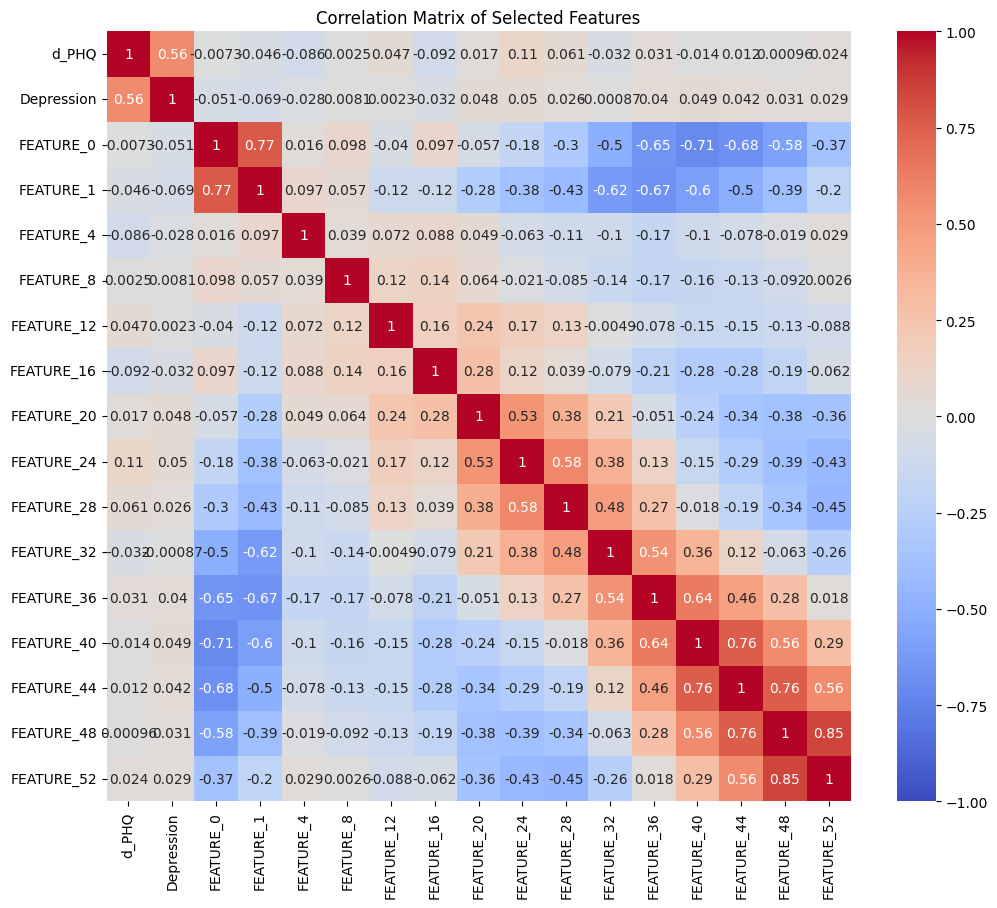

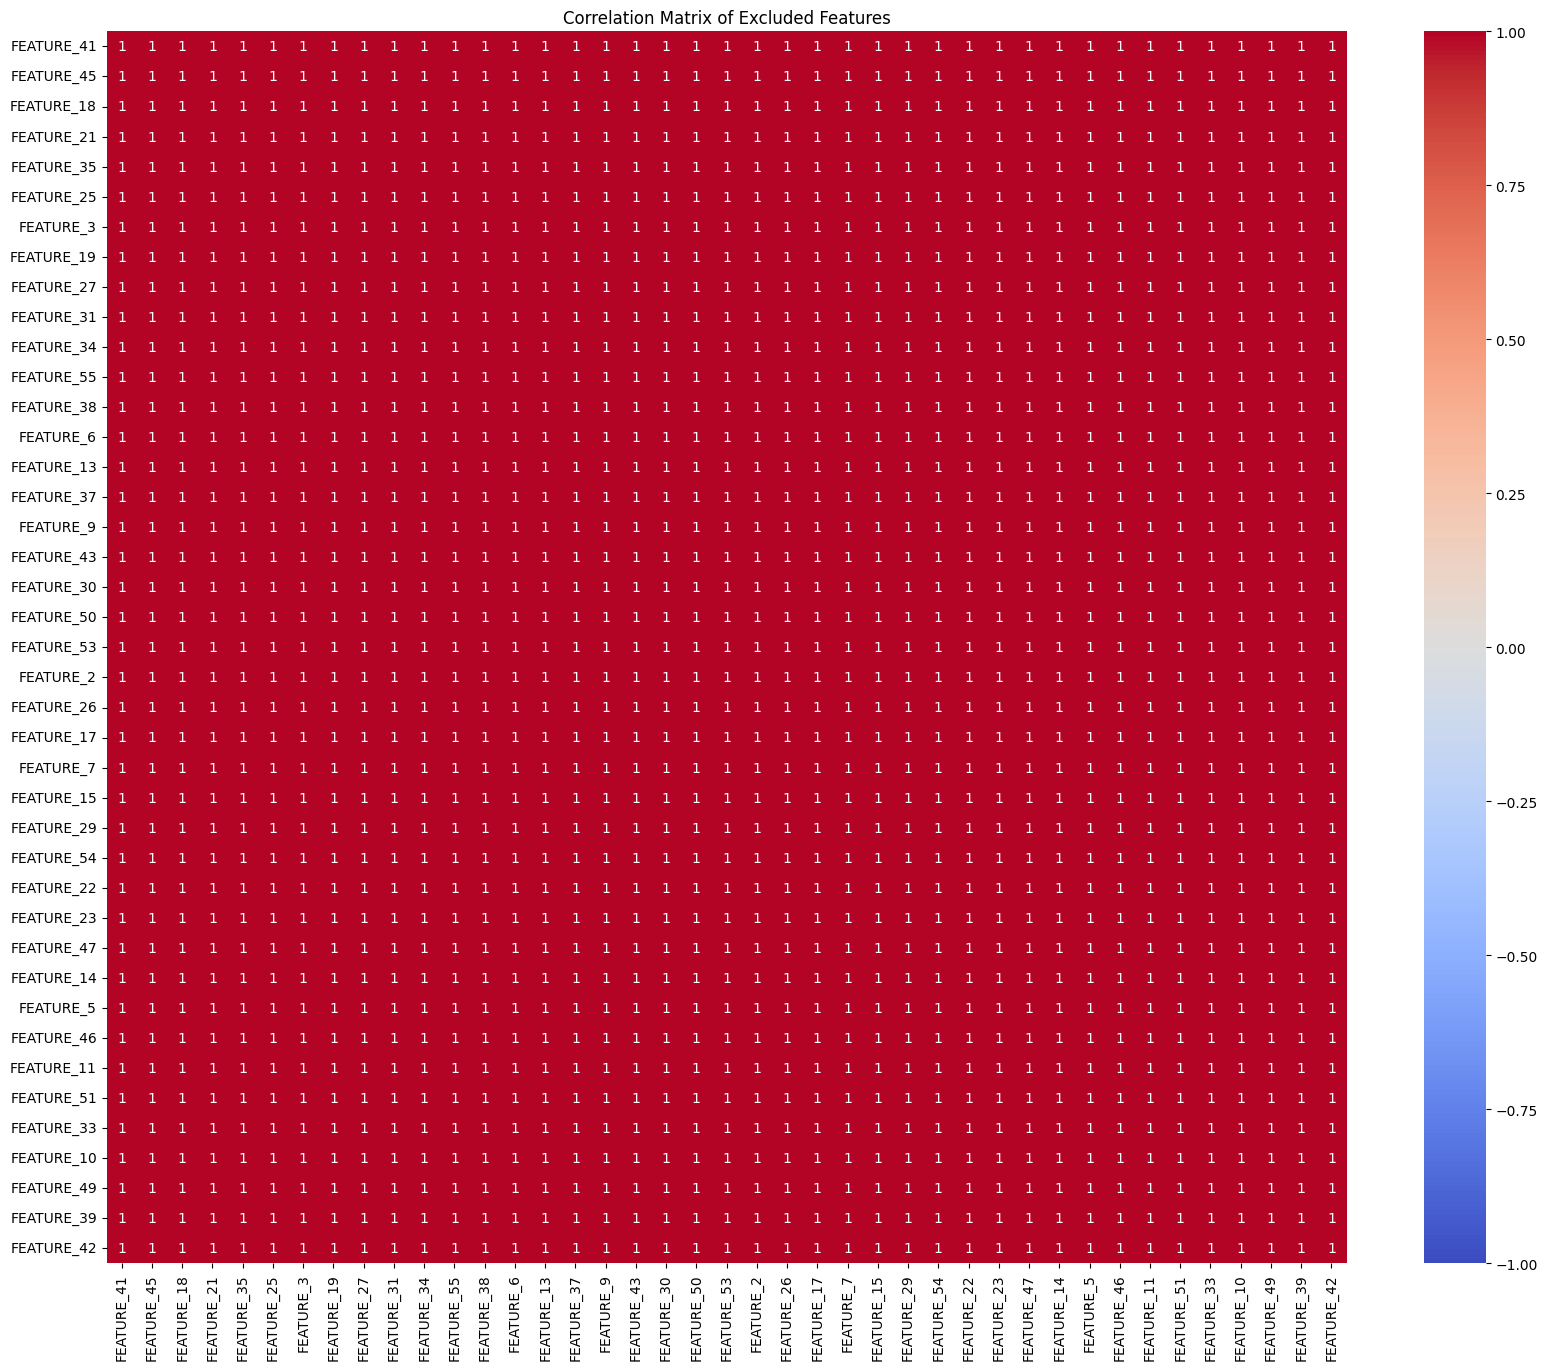

Selected Features: ['d_PHQ', 'Depression', 'FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']
Excluded Features: ['FEATURE_41', 'FEATURE_45', 'FEATURE_18', 'FEATURE_21', 'FEATURE_35', 'FEATURE_25', 'FEATURE_3', 'FEATURE_19', 'FEATURE_27', 'FEATURE_31', 'FEATURE_34', 'FEATURE_55', 'FEATURE_38', 'FEATURE_6', 'FEATURE_13', 'FEATURE_37', 'FEATURE_9', 'FEATURE_43', 'FEATURE_30', 'FEATURE_50', 'FEATURE_53', 'FEATURE_2', 'FEATURE_26', 'FEATURE_17', 'FEATURE_7', 'FEATURE_15', 'FEATURE_29', 'FEATURE_54', 'FEATURE_22', 'FEATURE_23', 'FEATURE_47', 'FEATURE_14', 'FEATURE_5', 'FEATURE_46', 'FEATURE_11', 'FEATURE_51', 'FEATURE_33', 'FEATURE_10', 'FEATURE_49', 'FEATURE_39', 'FEATURE_42']
df_BP_PHQ_9_s2


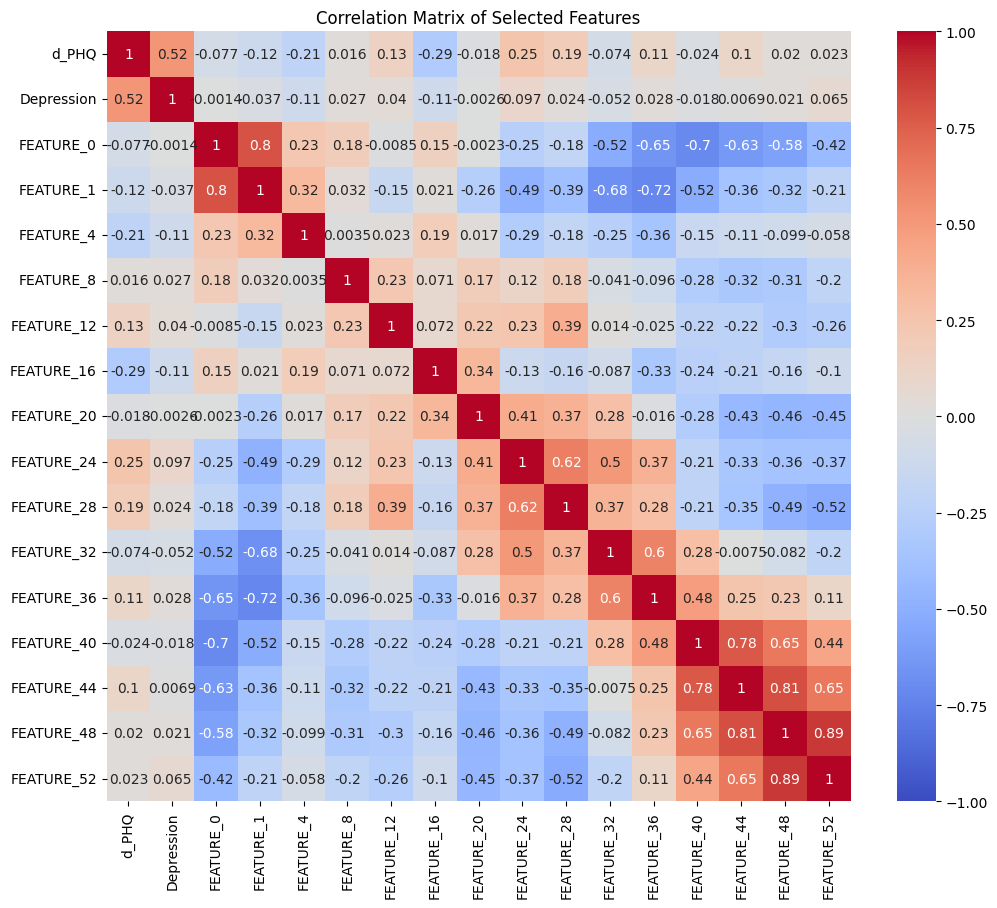

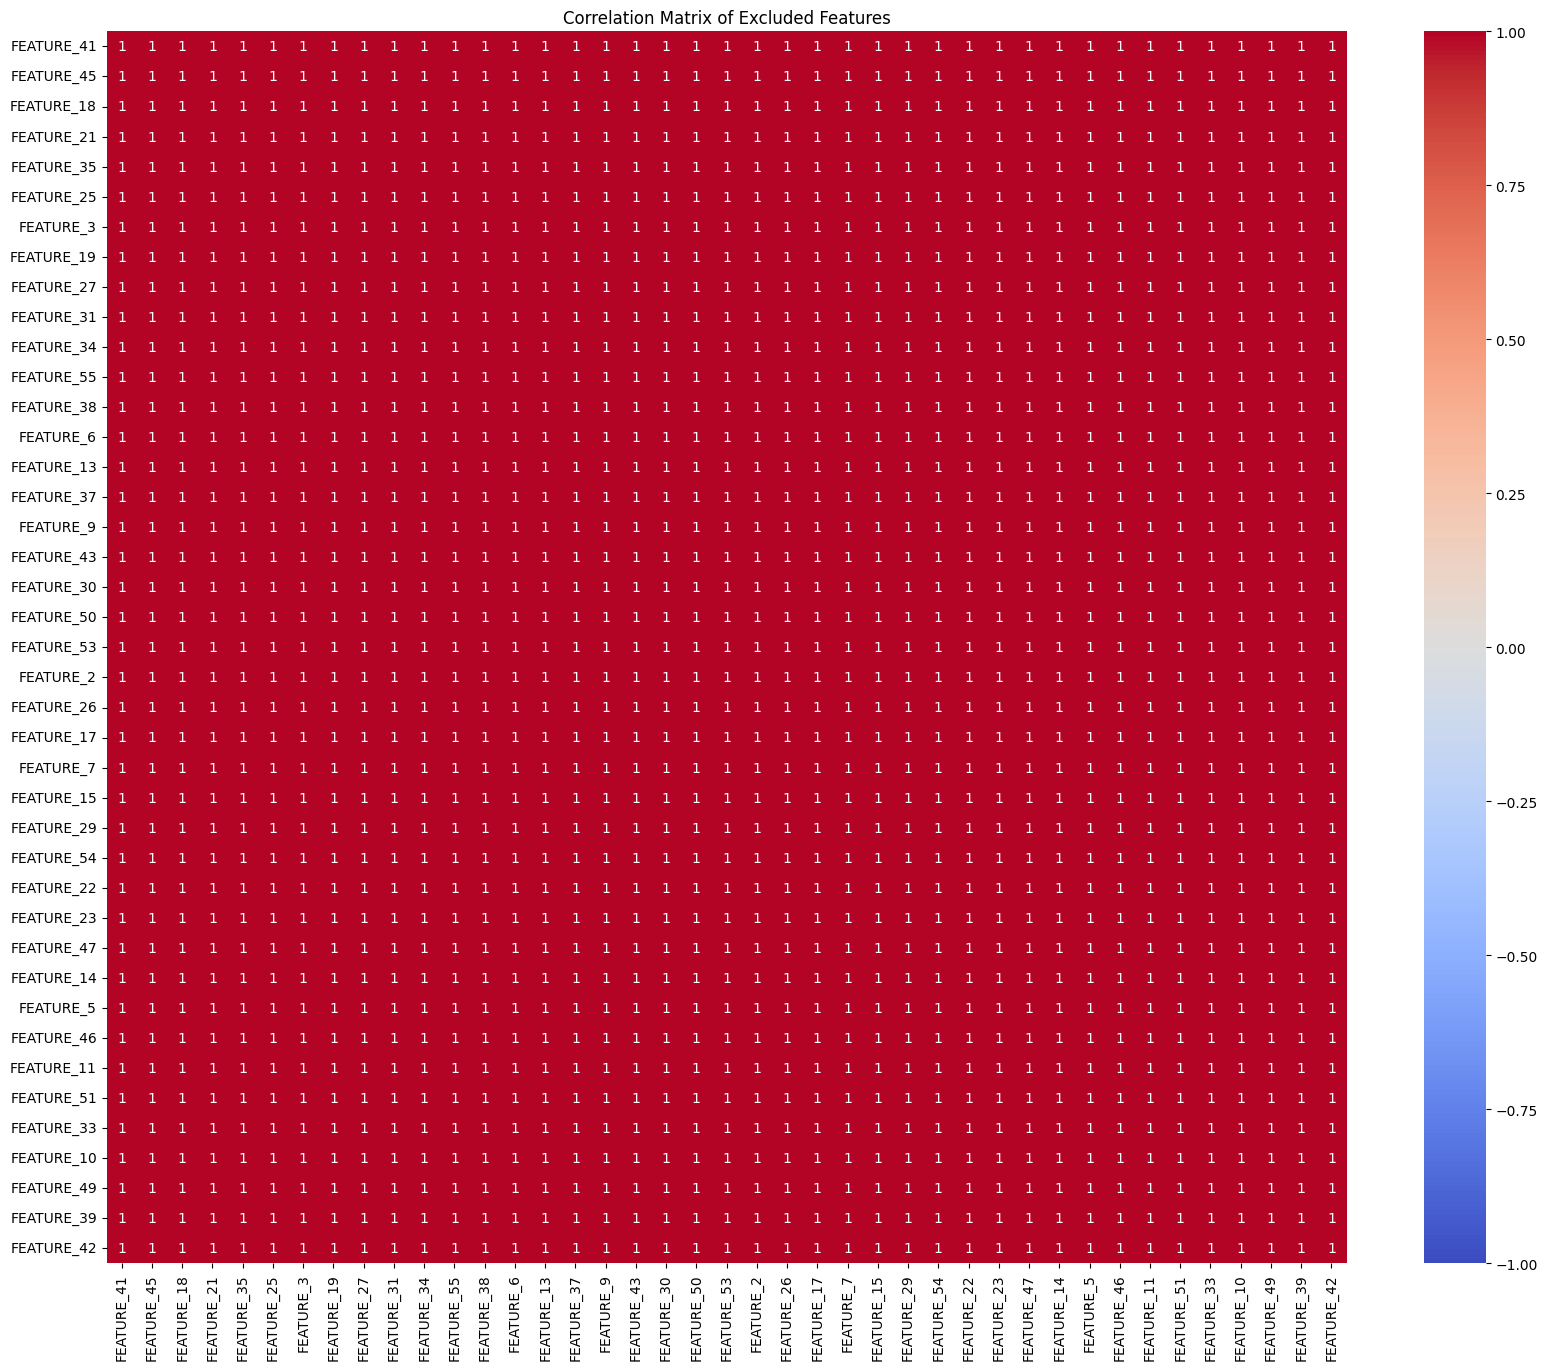

Selected Features: ['d_PHQ', 'Depression', 'FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']
Excluded Features: ['FEATURE_41', 'FEATURE_45', 'FEATURE_18', 'FEATURE_21', 'FEATURE_35', 'FEATURE_25', 'FEATURE_3', 'FEATURE_19', 'FEATURE_27', 'FEATURE_31', 'FEATURE_34', 'FEATURE_55', 'FEATURE_38', 'FEATURE_6', 'FEATURE_13', 'FEATURE_37', 'FEATURE_9', 'FEATURE_43', 'FEATURE_30', 'FEATURE_50', 'FEATURE_53', 'FEATURE_2', 'FEATURE_26', 'FEATURE_17', 'FEATURE_7', 'FEATURE_15', 'FEATURE_29', 'FEATURE_54', 'FEATURE_22', 'FEATURE_23', 'FEATURE_47', 'FEATURE_14', 'FEATURE_5', 'FEATURE_46', 'FEATURE_11', 'FEATURE_51', 'FEATURE_33', 'FEATURE_10', 'FEATURE_49', 'FEATURE_39', 'FEATURE_42']
df_MH_PHQ_S_s1


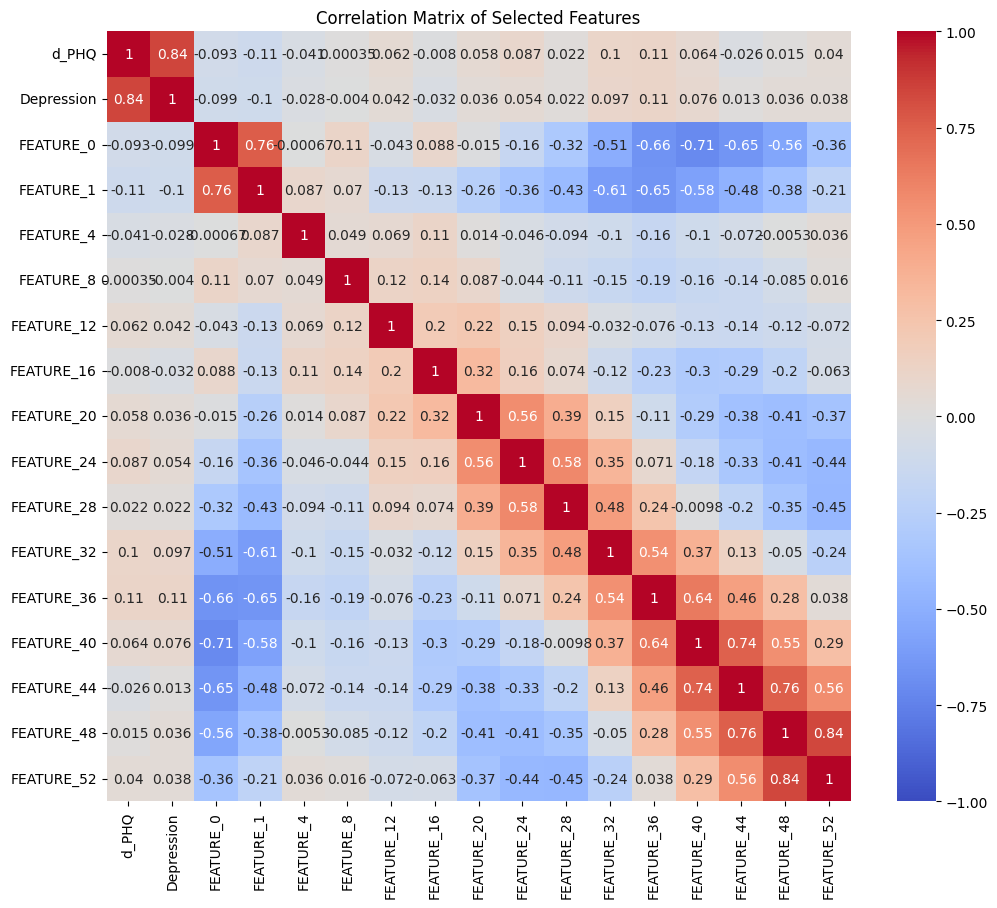

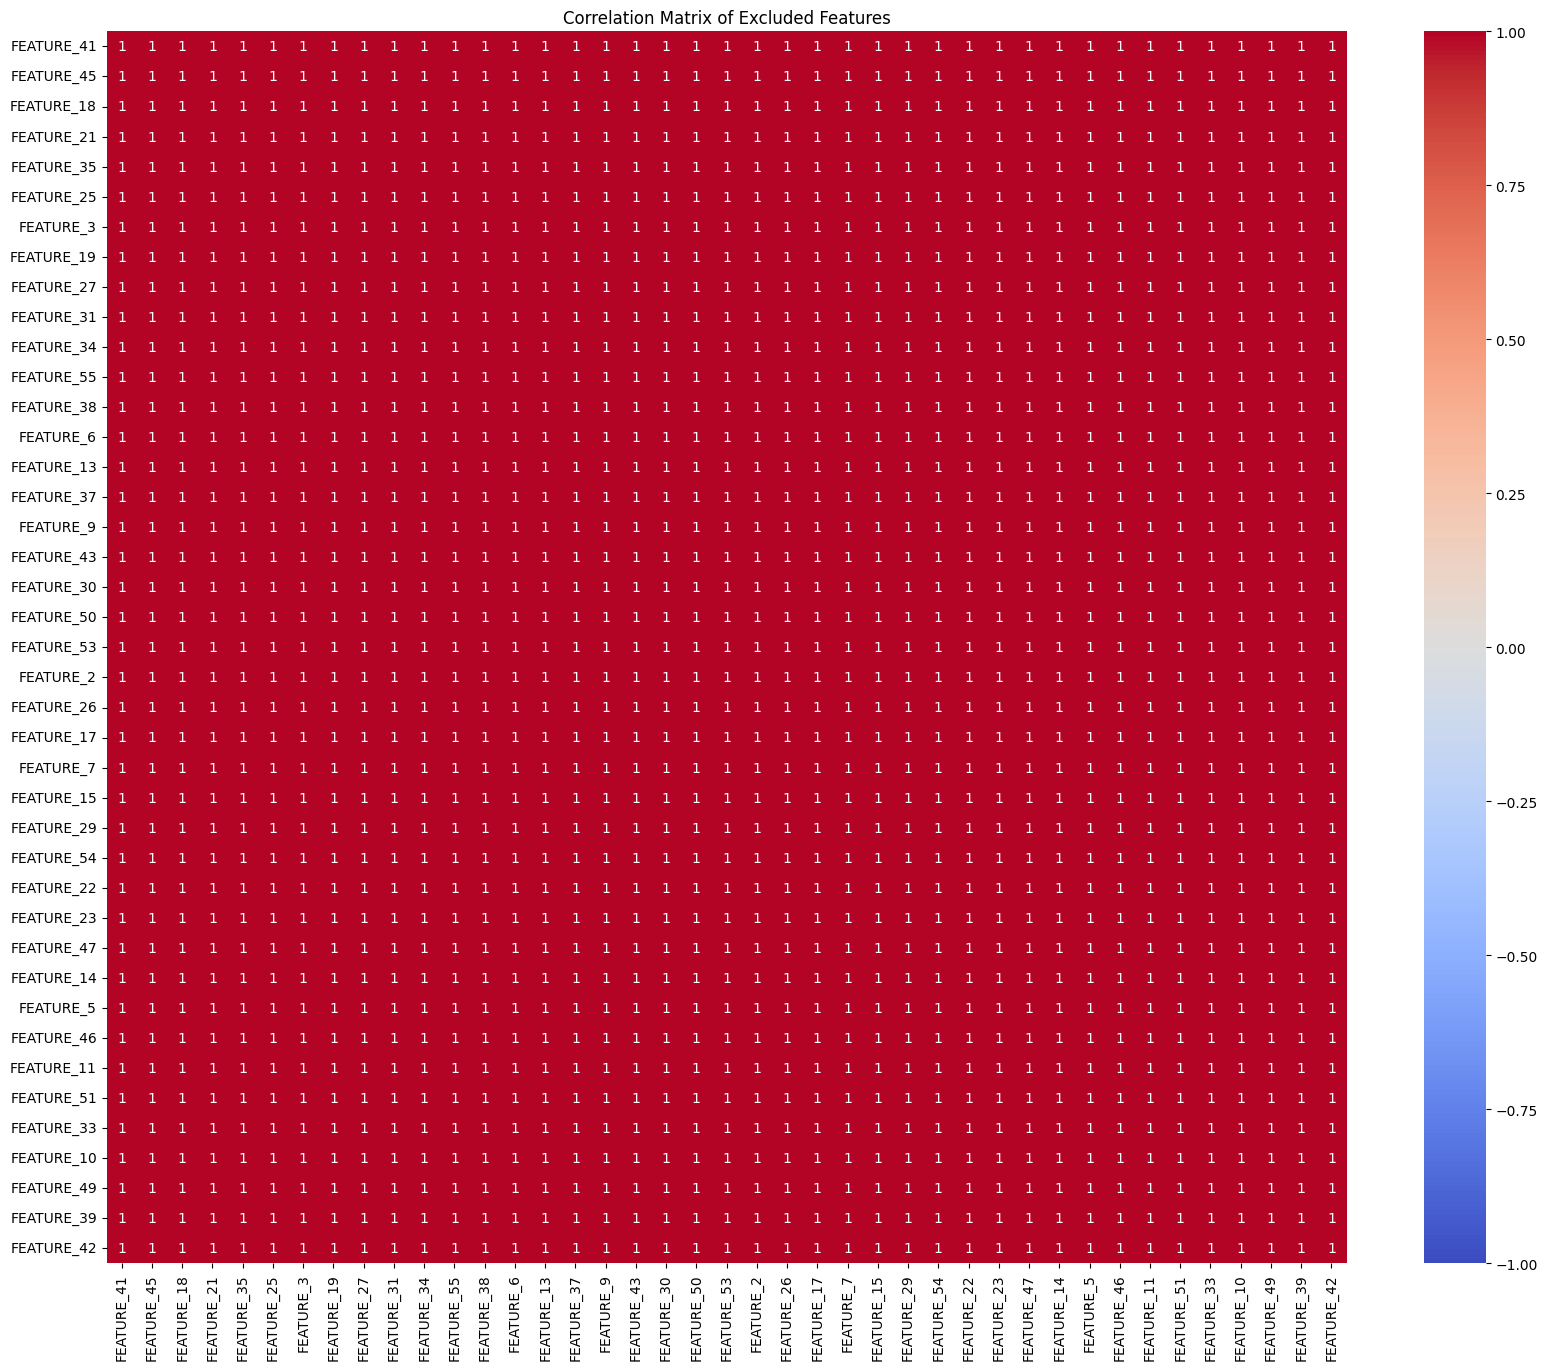

Selected Features: ['d_PHQ', 'Depression', 'FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']
Excluded Features: ['FEATURE_41', 'FEATURE_45', 'FEATURE_18', 'FEATURE_21', 'FEATURE_35', 'FEATURE_25', 'FEATURE_3', 'FEATURE_19', 'FEATURE_27', 'FEATURE_31', 'FEATURE_34', 'FEATURE_55', 'FEATURE_38', 'FEATURE_6', 'FEATURE_13', 'FEATURE_37', 'FEATURE_9', 'FEATURE_43', 'FEATURE_30', 'FEATURE_50', 'FEATURE_53', 'FEATURE_2', 'FEATURE_26', 'FEATURE_17', 'FEATURE_7', 'FEATURE_15', 'FEATURE_29', 'FEATURE_54', 'FEATURE_22', 'FEATURE_23', 'FEATURE_47', 'FEATURE_14', 'FEATURE_5', 'FEATURE_46', 'FEATURE_11', 'FEATURE_51', 'FEATURE_33', 'FEATURE_10', 'FEATURE_49', 'FEATURE_39', 'FEATURE_42']
df_MH_PHQ_S_s2


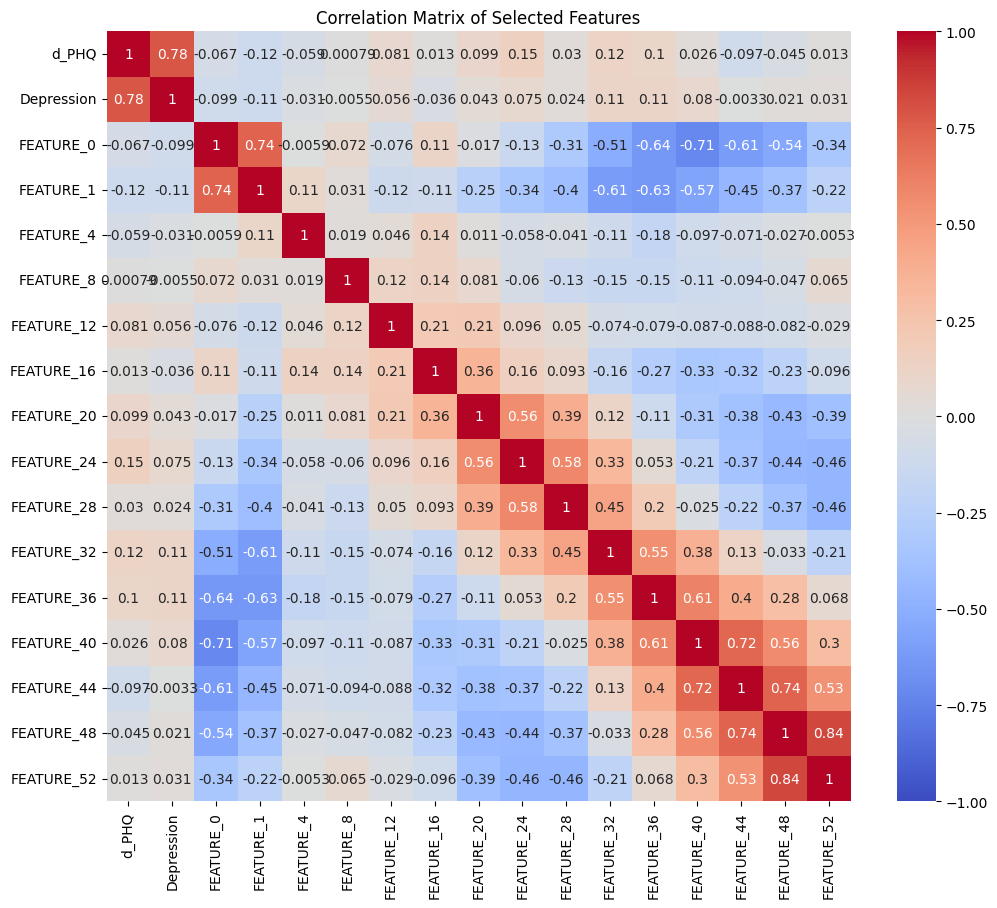

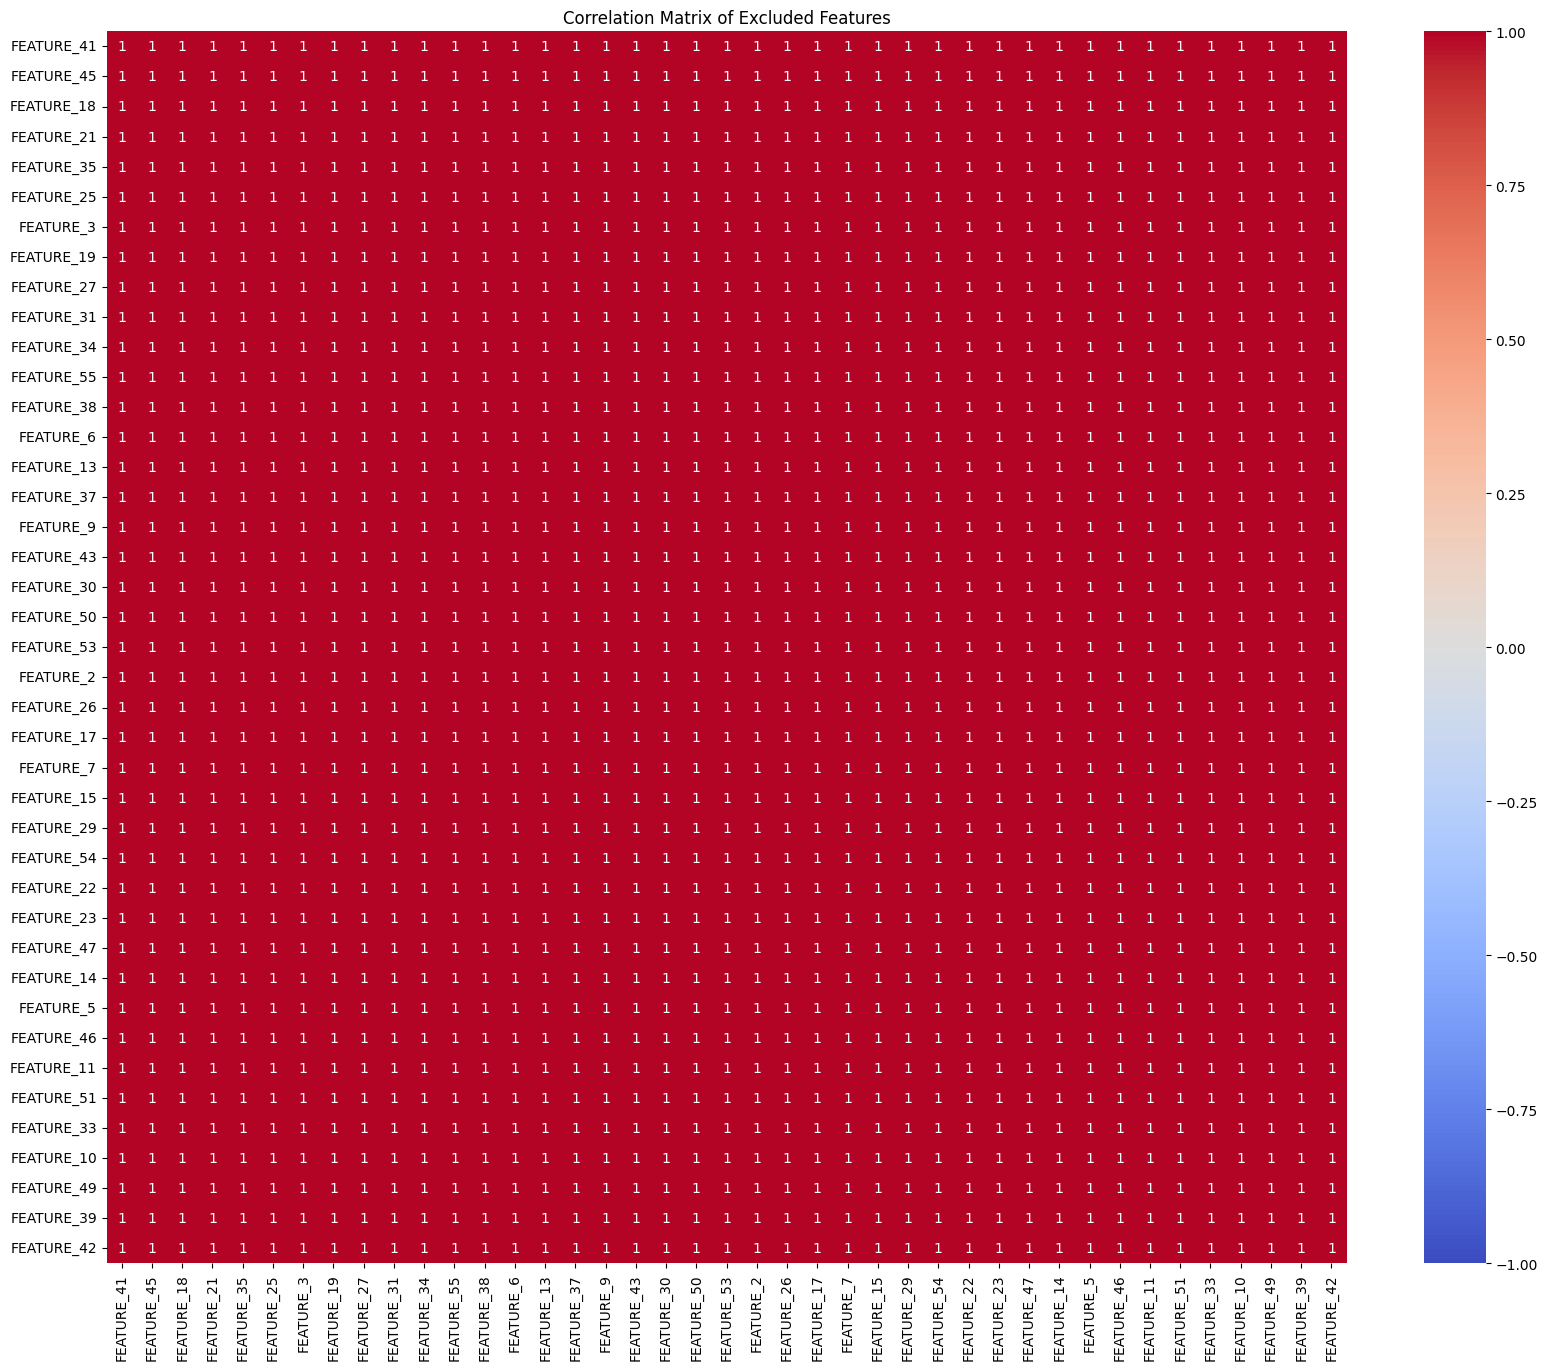

Selected Features: ['d_PHQ', 'Depression', 'FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']
Excluded Features: ['FEATURE_41', 'FEATURE_45', 'FEATURE_18', 'FEATURE_21', 'FEATURE_35', 'FEATURE_25', 'FEATURE_3', 'FEATURE_19', 'FEATURE_27', 'FEATURE_31', 'FEATURE_34', 'FEATURE_55', 'FEATURE_38', 'FEATURE_6', 'FEATURE_13', 'FEATURE_37', 'FEATURE_9', 'FEATURE_43', 'FEATURE_30', 'FEATURE_50', 'FEATURE_53', 'FEATURE_2', 'FEATURE_26', 'FEATURE_17', 'FEATURE_7', 'FEATURE_15', 'FEATURE_29', 'FEATURE_54', 'FEATURE_22', 'FEATURE_23', 'FEATURE_47', 'FEATURE_14', 'FEATURE_5', 'FEATURE_46', 'FEATURE_11', 'FEATURE_51', 'FEATURE_33', 'FEATURE_10', 'FEATURE_49', 'FEATURE_39', 'FEATURE_42']


In [3]:
# apply feature extraction on input data

# drop not-numeric columns before applying feature extraction function
df_BP_PHQ_9_s1 = df_BP_PHQ_9_s1.select_dtypes(include=[np.number])
df_BP_PHQ_9_s2 = df_BP_PHQ_9_s2.select_dtypes(include=[np.number])
df_MH_PHQ_S_s1 = df_MH_PHQ_S_s1.select_dtypes(include=[np.number])
df_MH_PHQ_S_s2 = df_MH_PHQ_S_s2.select_dtypes(include=[np.number])

# Apply feature extraction function to each DataFrame
print("df_BP_PHQ_9_s1")
selected_features_BP_PHQ_9_s1, _ = extractor(df_BP_PHQ_9_s1, threshold=0.9)

print("df_BP_PHQ_9_s2")
selected_features_BP_PHQ_9_s2, _ = extractor(df_BP_PHQ_9_s2, threshold=0.9)

print("df_MH_PHQ_S_s1")
selected_features_MH_PHQ_S_s1, _ = extractor(df_MH_PHQ_S_s1, threshold=0.9)

print("df_MH_PHQ_S_s2")
selected_features_MH_PHQ_S_s2, _ = extractor(df_MH_PHQ_S_s2, threshold=0.9)

# Put selected features in separate DataFrames
selected_df_BP_PHQ_9_s1 = df_BP_PHQ_9_s1[selected_features_BP_PHQ_9_s1]
selected_df_BP_PHQ_9_s2 = df_BP_PHQ_9_s2[selected_features_BP_PHQ_9_s2]
selected_df_MH_PHQ_S_s1 = df_MH_PHQ_S_s1[selected_features_MH_PHQ_S_s1]
selected_df_MH_PHQ_S_s2 = df_MH_PHQ_S_s2[selected_features_MH_PHQ_S_s2]

#Further EDA with selected Features

Overview for selected_df_BP_PHQ_9_s1
(20018, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20018 entries, 0 to 20017
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   d_PHQ       20018 non-null  float64
 1   Depression  20018 non-null  int64  
 2   FEATURE_0   20018 non-null  float64
 3   FEATURE_1   20018 non-null  float64
 4   FEATURE_4   20018 non-null  float64
 5   FEATURE_8   20018 non-null  float64
 6   FEATURE_12  20018 non-null  float64
 7   FEATURE_16  20018 non-null  float64
 8   FEATURE_20  20018 non-null  float64
 9   FEATURE_24  20018 non-null  float64
 10  FEATURE_28  20018 non-null  float64
 11  FEATURE_32  20018 non-null  float64
 12  FEATURE_36  20018 non-null  float64
 13  FEATURE_40  20018 non-null  float64
 14  FEATURE_44  20018 non-null  float64
 15  FEATURE_48  20018 non-null  float64
 16  FEATURE_52  20018 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 2.6 MB
None
       

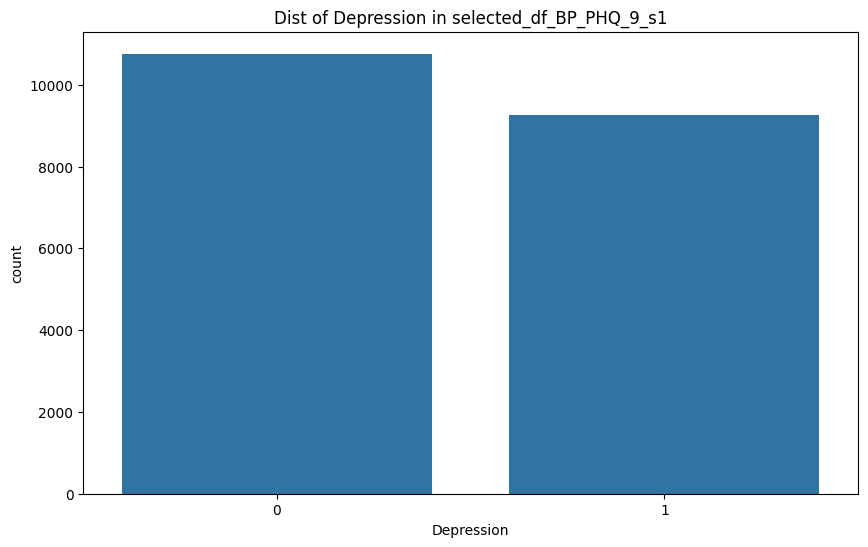

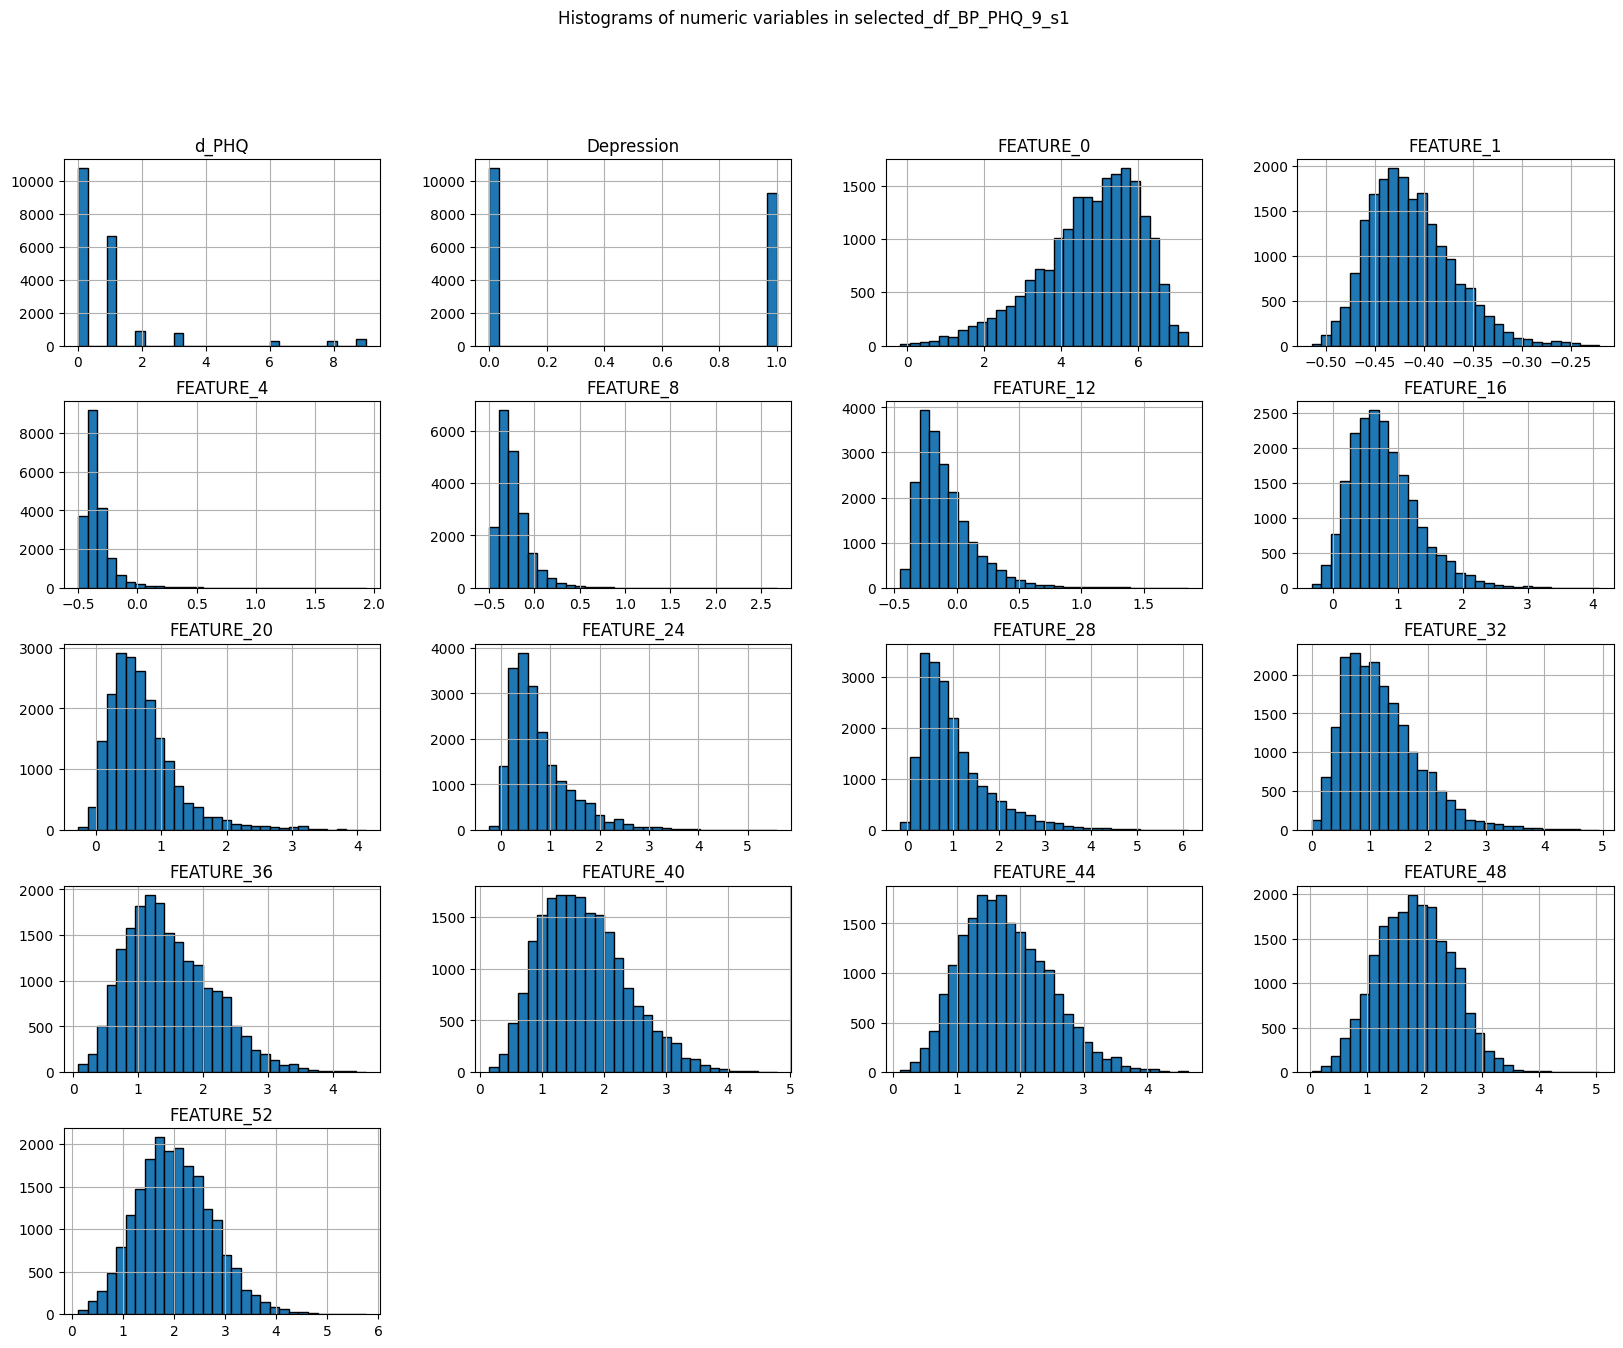

C:\Users\v4sc0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\v4sc0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\v4sc0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

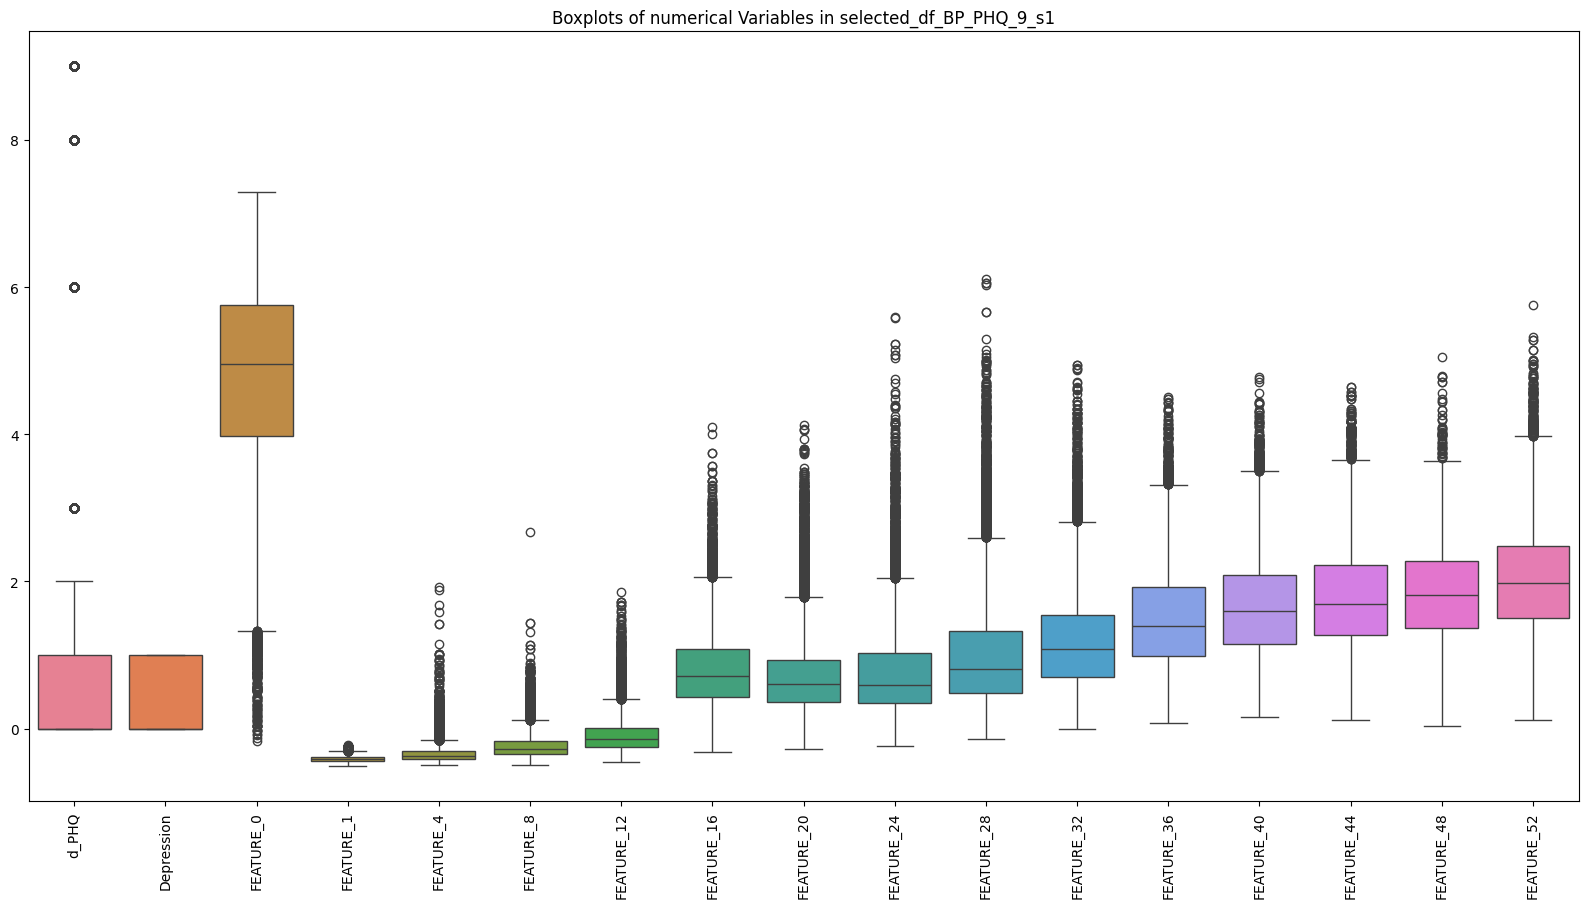

Overview for selected_df_BP_PHQ_9_s2
(7532, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7532 entries, 0 to 7531
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   d_PHQ       7532 non-null   float64
 1   Depression  7532 non-null   int64  
 2   FEATURE_0   7532 non-null   float64
 3   FEATURE_1   7532 non-null   float64
 4   FEATURE_4   7532 non-null   float64
 5   FEATURE_8   7532 non-null   float64
 6   FEATURE_12  7532 non-null   float64
 7   FEATURE_16  7532 non-null   float64
 8   FEATURE_20  7532 non-null   float64
 9   FEATURE_24  7532 non-null   float64
 10  FEATURE_28  7532 non-null   float64
 11  FEATURE_32  7532 non-null   float64
 12  FEATURE_36  7532 non-null   float64
 13  FEATURE_40  7532 non-null   float64
 14  FEATURE_44  7532 non-null   float64
 15  FEATURE_48  7532 non-null   float64
 16  FEATURE_52  7532 non-null   float64
dtypes: float64(16), int64(1)
memory usage: 1000.5 KB
None
       

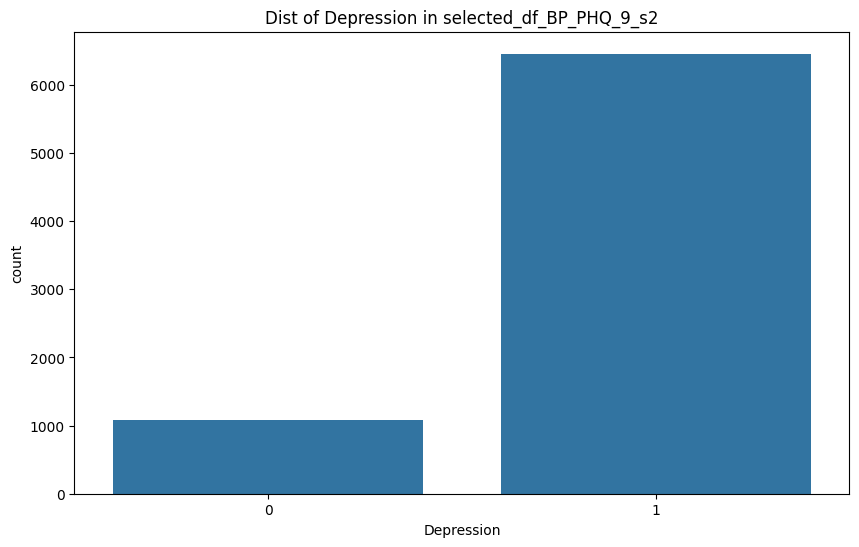

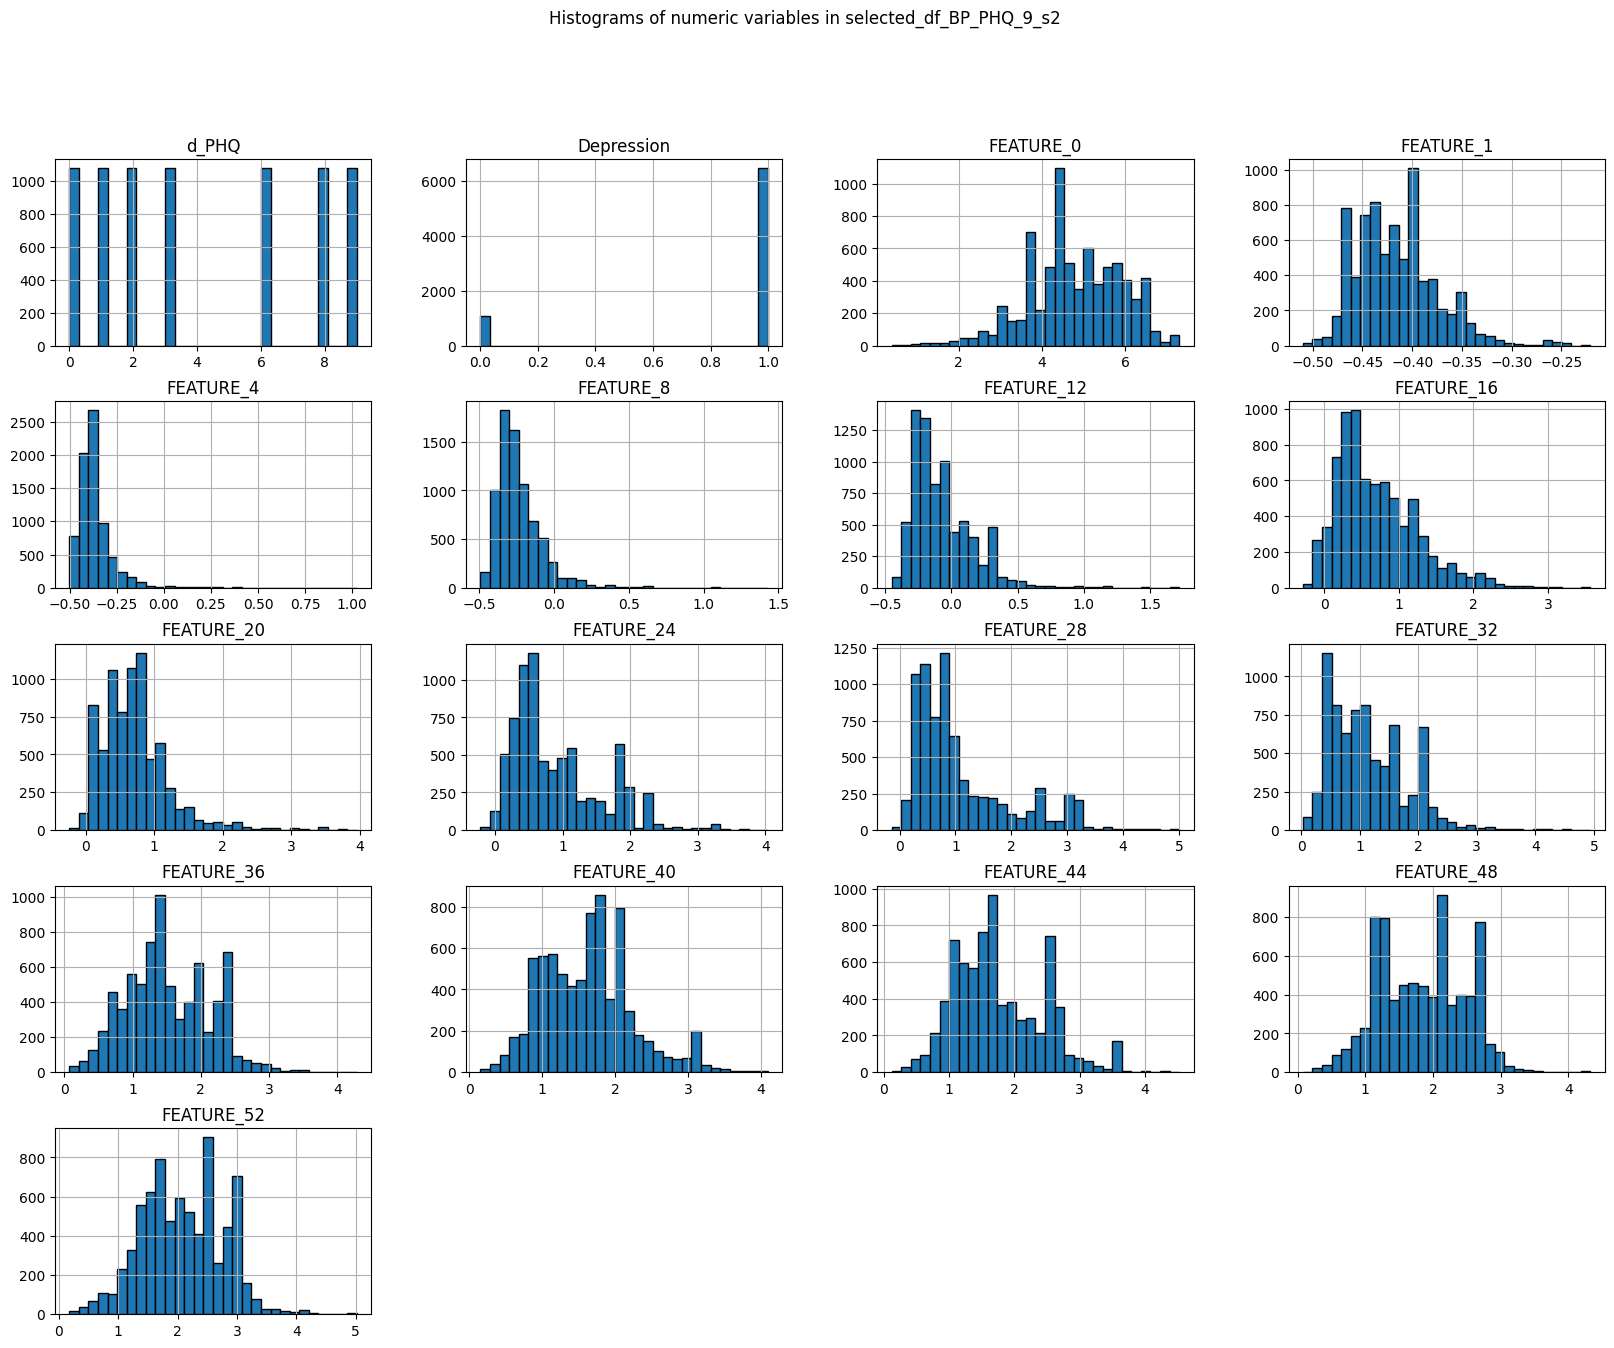

C:\Users\v4sc0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\v4sc0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\v4sc0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

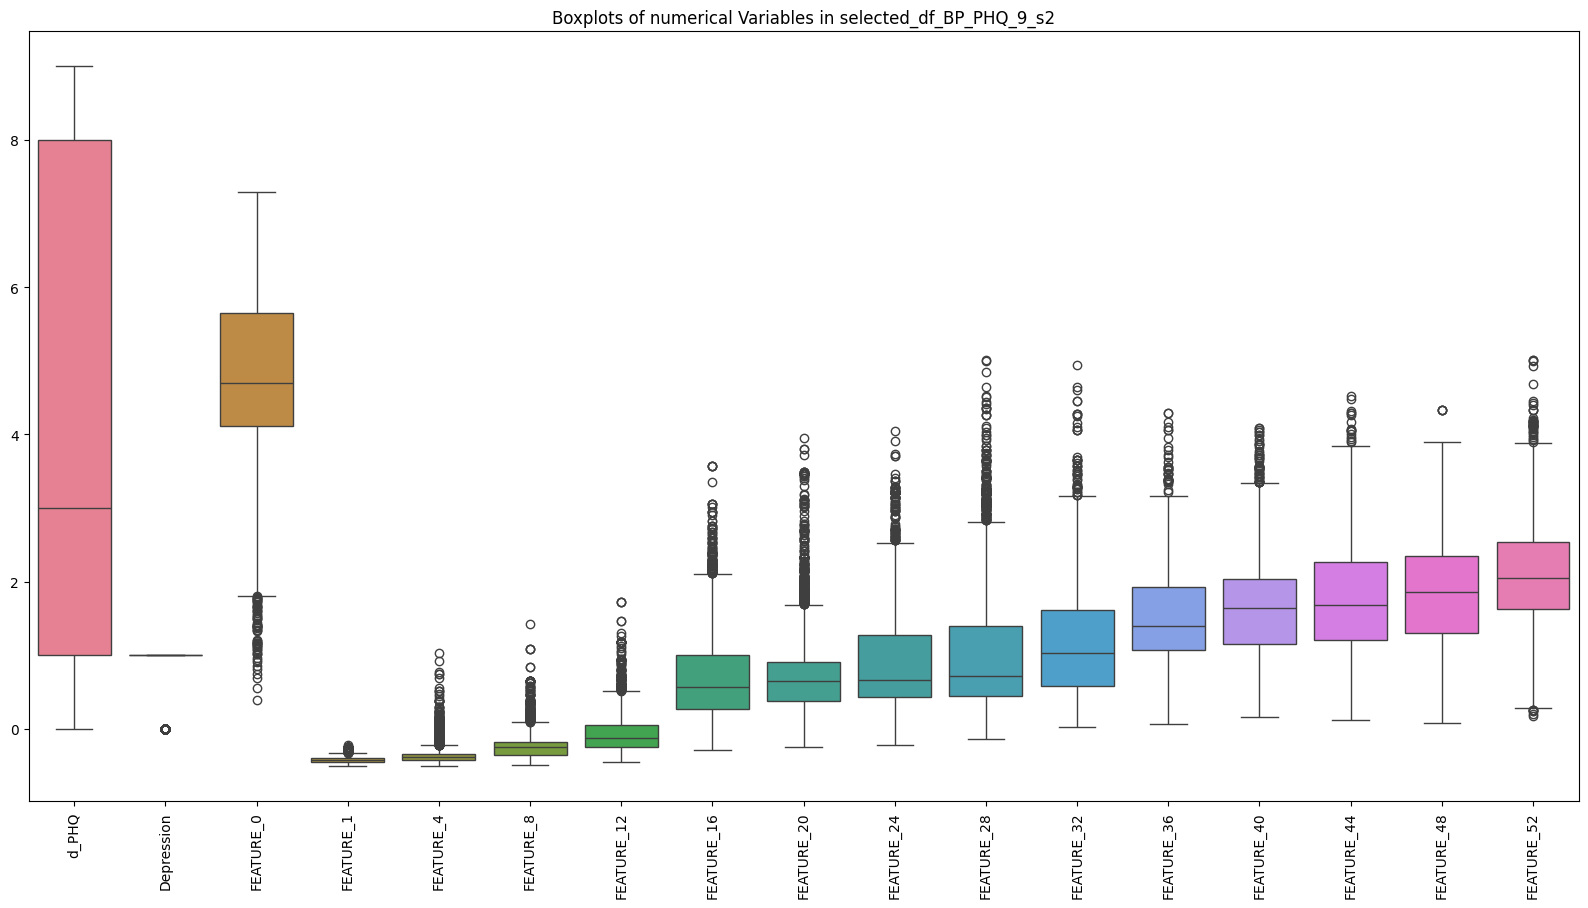

Overview for selected_df_MH_PHQ_S_s1
(55730, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55730 entries, 0 to 55729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   d_PHQ       55730 non-null  float64
 1   Depression  55730 non-null  int64  
 2   FEATURE_0   55730 non-null  float64
 3   FEATURE_1   55730 non-null  float64
 4   FEATURE_4   55730 non-null  float64
 5   FEATURE_8   55730 non-null  float64
 6   FEATURE_12  55730 non-null  float64
 7   FEATURE_16  55730 non-null  float64
 8   FEATURE_20  55730 non-null  float64
 9   FEATURE_24  55730 non-null  float64
 10  FEATURE_28  55730 non-null  float64
 11  FEATURE_32  55730 non-null  float64
 12  FEATURE_36  55730 non-null  float64
 13  FEATURE_40  55730 non-null  float64
 14  FEATURE_44  55730 non-null  float64
 15  FEATURE_48  55730 non-null  float64
 16  FEATURE_52  55730 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 7.2 MB
None
       

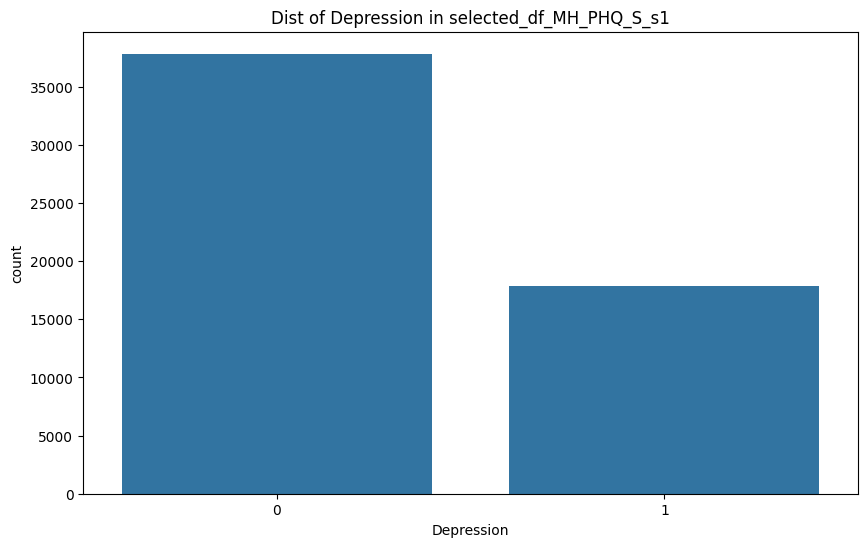

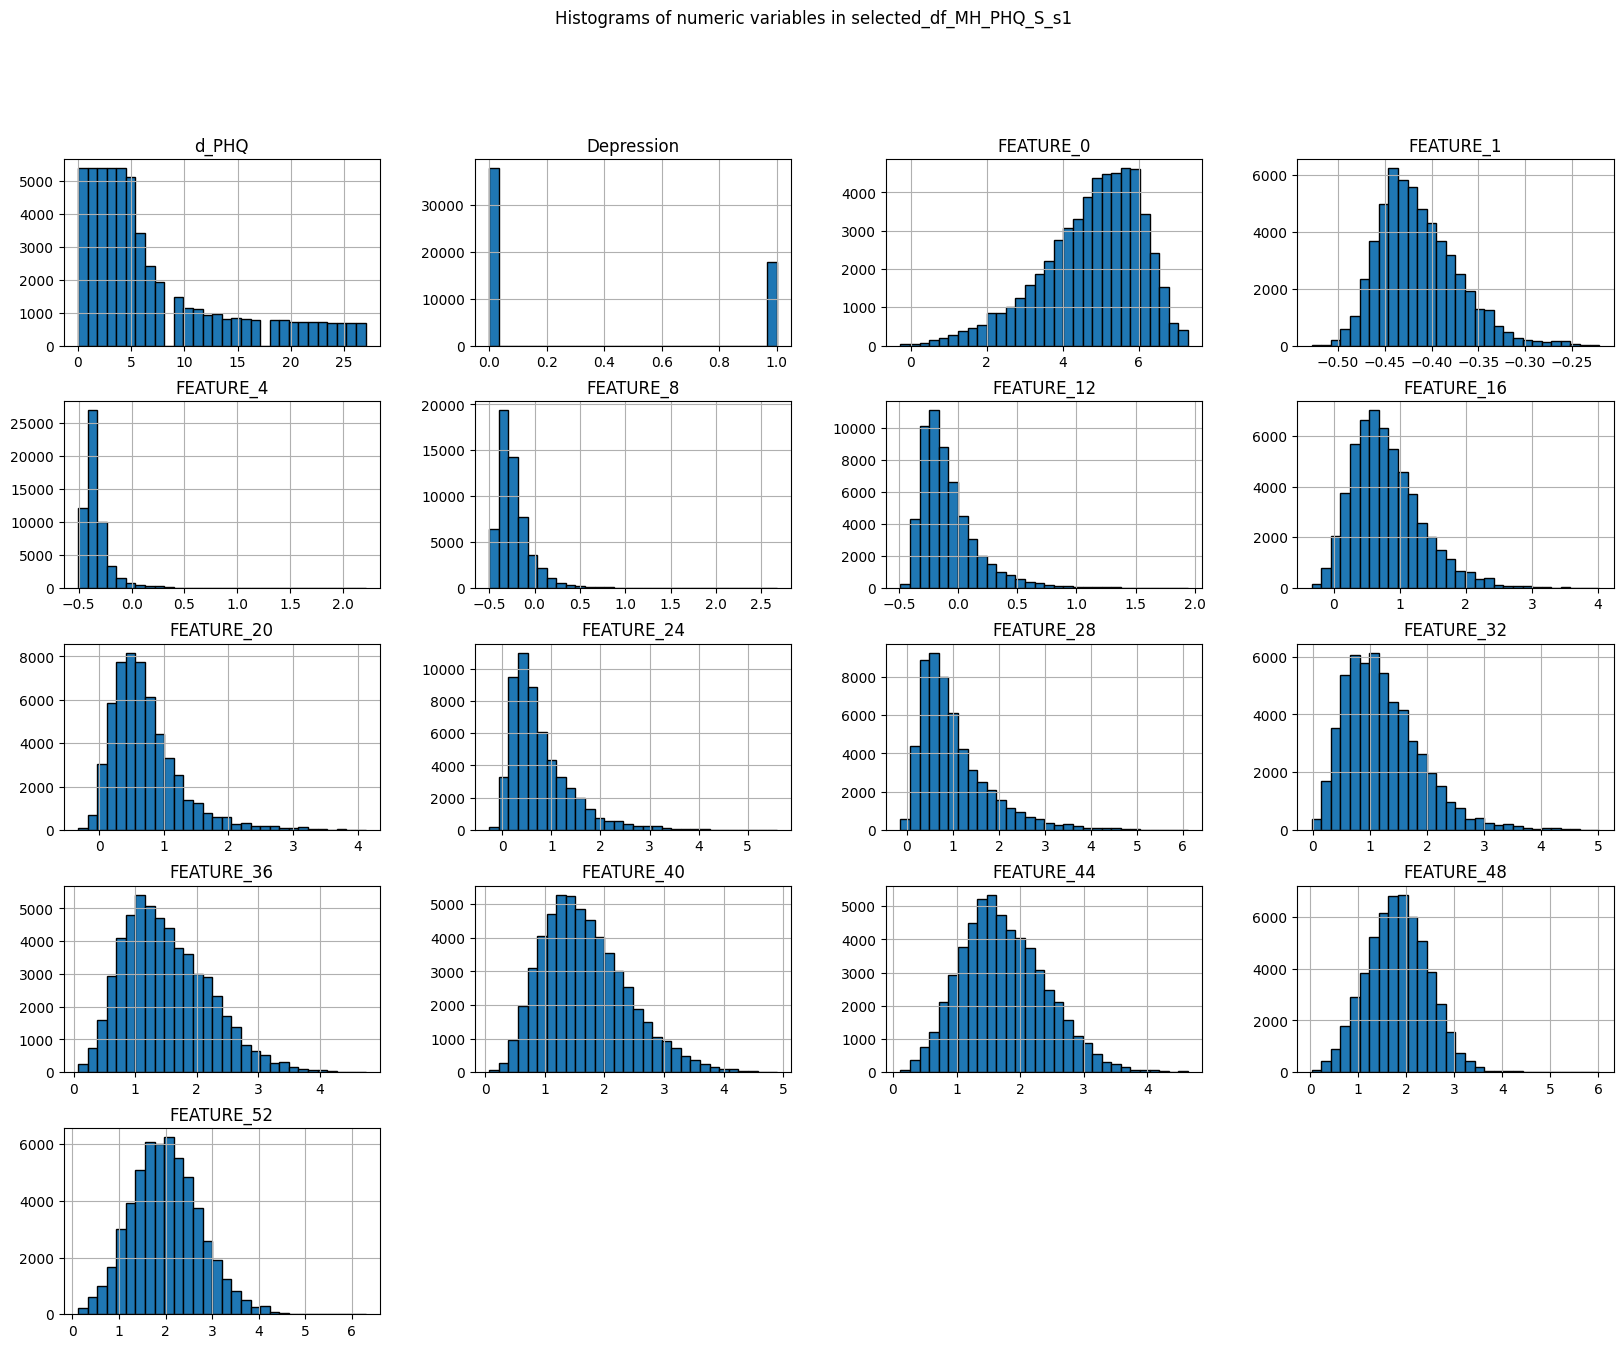

C:\Users\v4sc0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\v4sc0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\v4sc0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

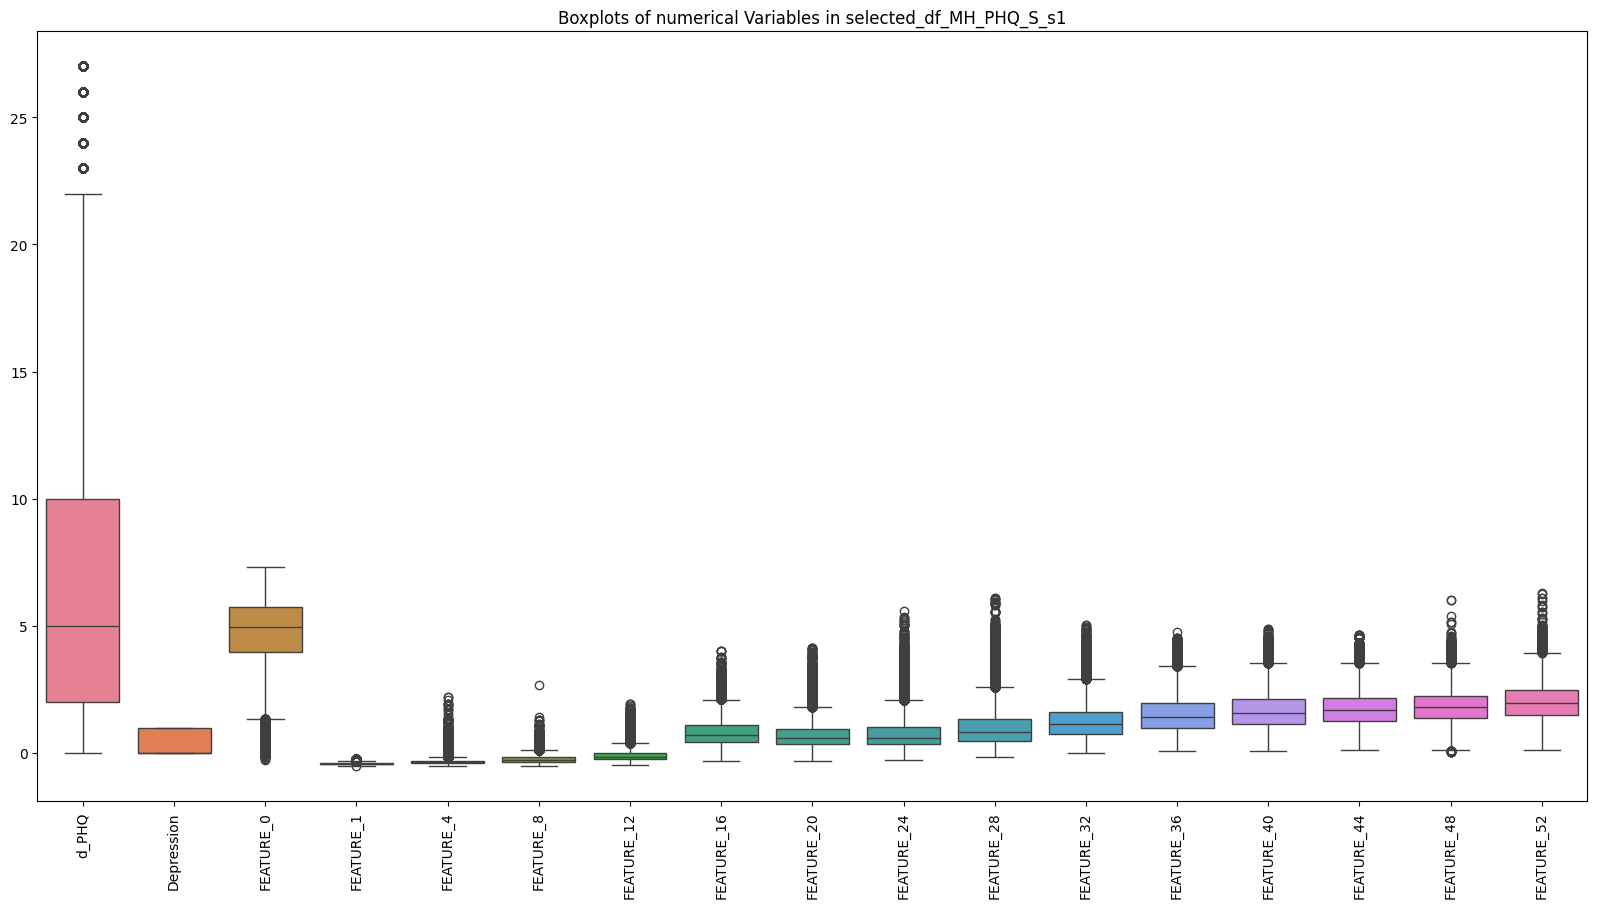

Overview for selected_df_MH_PHQ_S_s2
(37660, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37660 entries, 0 to 37659
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   d_PHQ       37660 non-null  float64
 1   Depression  37660 non-null  int64  
 2   FEATURE_0   37660 non-null  float64
 3   FEATURE_1   37660 non-null  float64
 4   FEATURE_4   37660 non-null  float64
 5   FEATURE_8   37660 non-null  float64
 6   FEATURE_12  37660 non-null  float64
 7   FEATURE_16  37660 non-null  float64
 8   FEATURE_20  37660 non-null  float64
 9   FEATURE_24  37660 non-null  float64
 10  FEATURE_28  37660 non-null  float64
 11  FEATURE_32  37660 non-null  float64
 12  FEATURE_36  37660 non-null  float64
 13  FEATURE_40  37660 non-null  float64
 14  FEATURE_44  37660 non-null  float64
 15  FEATURE_48  37660 non-null  float64
 16  FEATURE_52  37660 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 4.9 MB
None
       

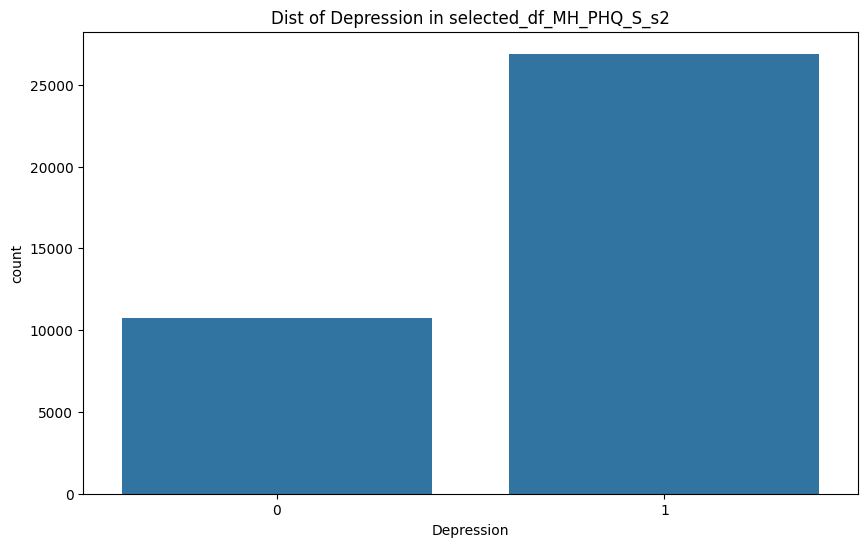

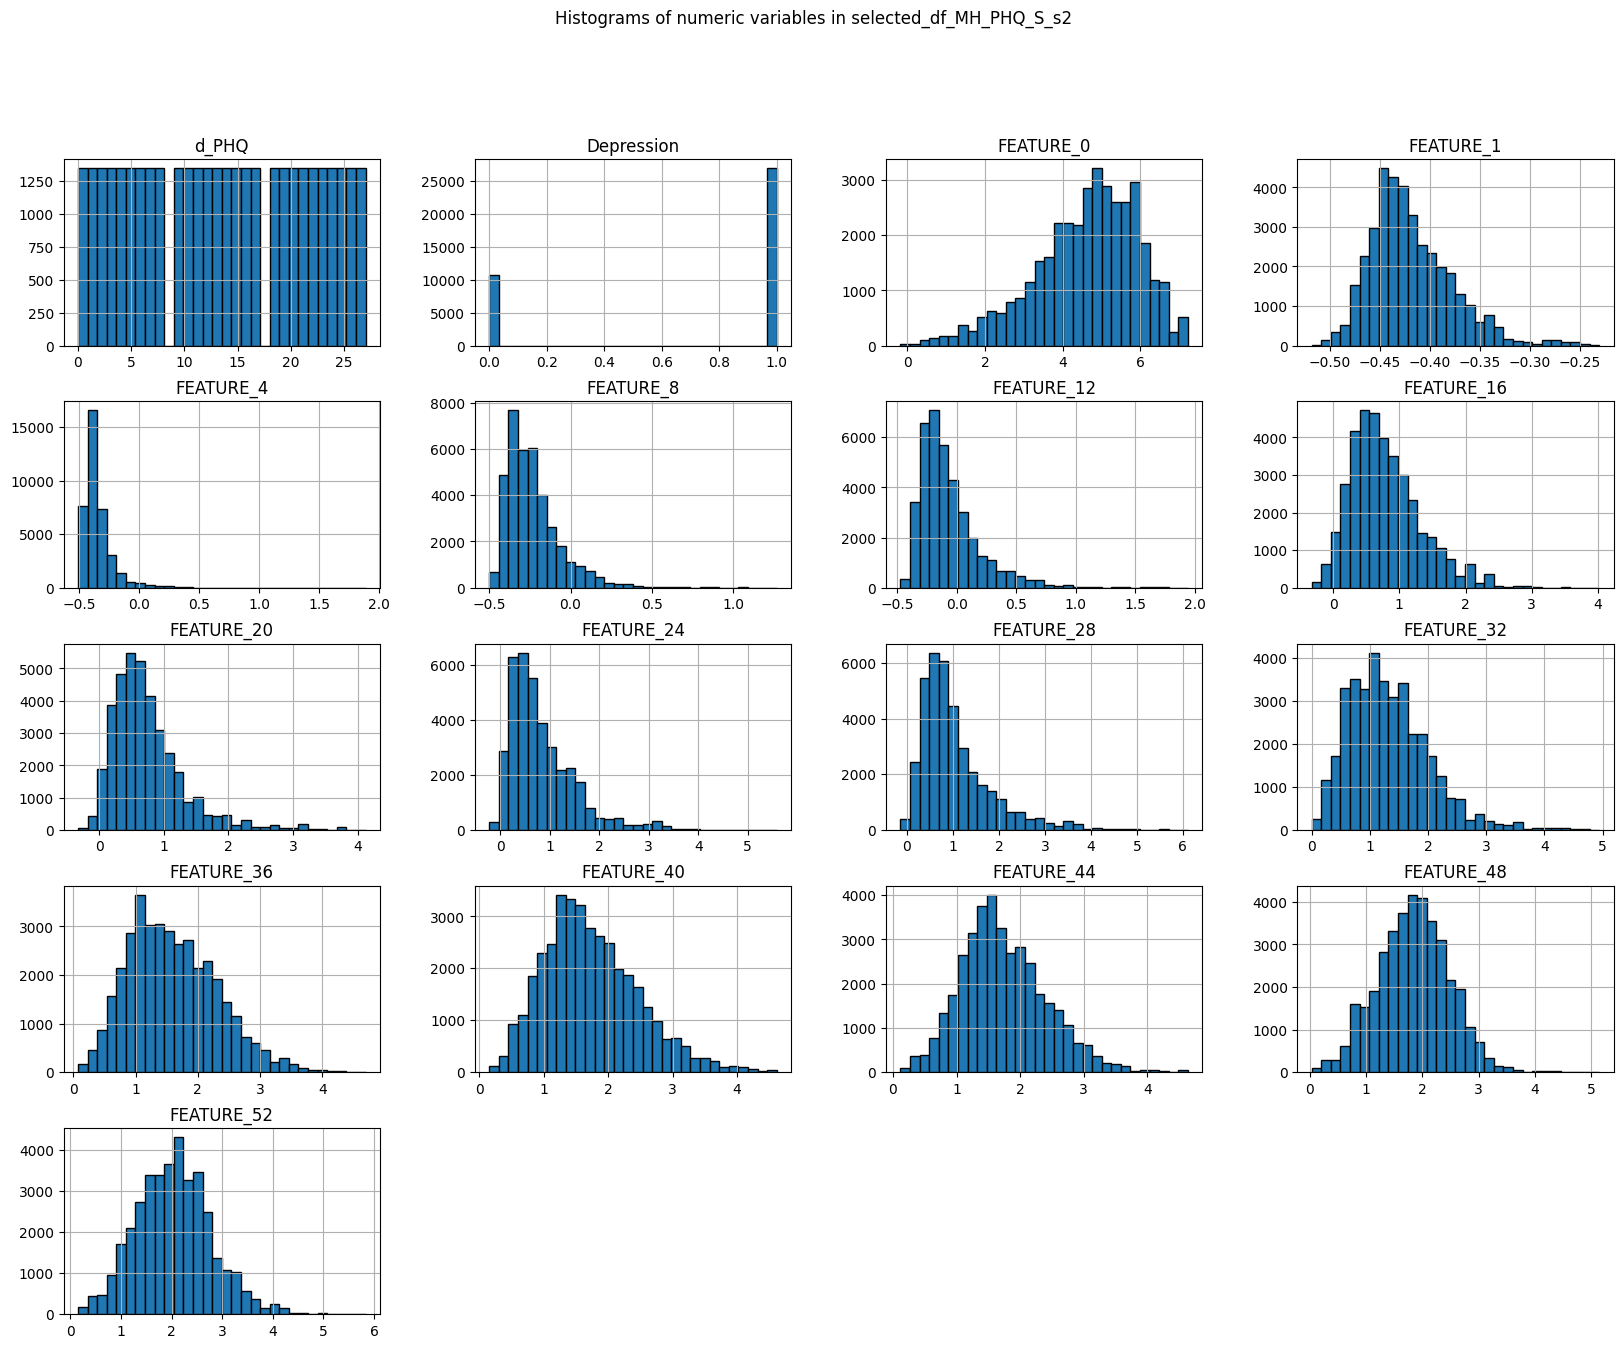

C:\Users\v4sc0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\v4sc0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\v4sc0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

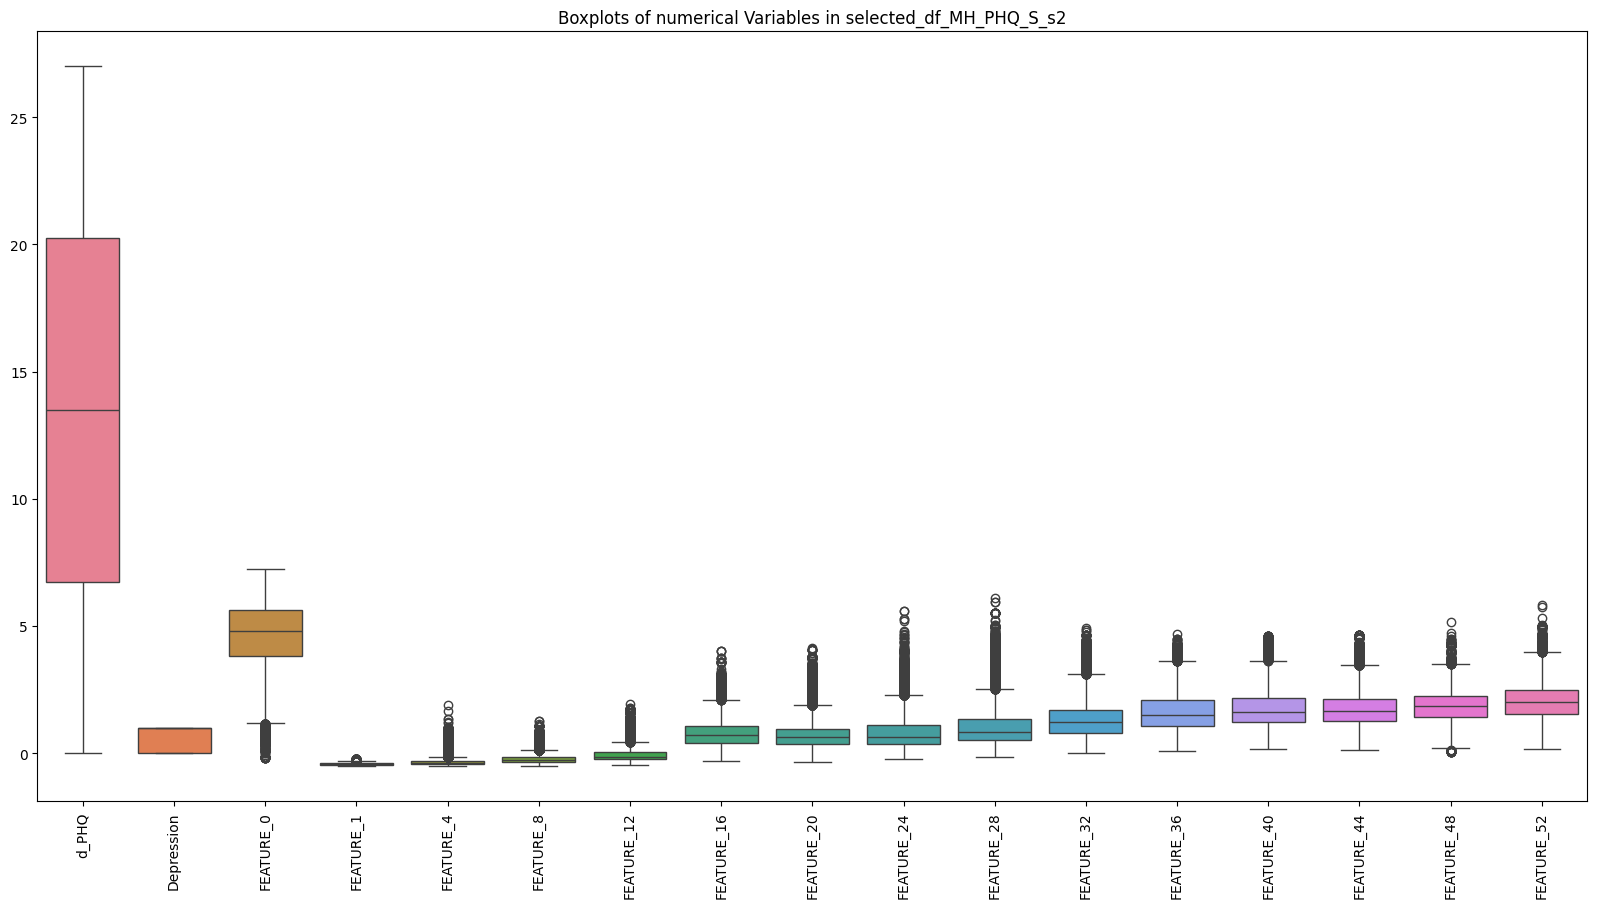

In [4]:
# Define a function to plot the data
def plot_data(df, df_name):
    print(f"Overview for {df_name}")
    print(df.shape)
    print(df.info())
    print(df.describe())

    # dist of depression
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Depression', data=df)
    plt.title(f'Dist of Depression in {df_name}')
    plt.show()

    # plot distr. of numeric variables
    df.hist(bins=30, figsize=(20, 15), edgecolor='black')
    plt.suptitle(f'Histograms of numeric variables in {df_name}')
    plt.show()

    # plot Boxplots
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=df)
    plt.title(f'Boxplots of numerical Variables in {df_name}')
    plt.xticks(rotation=90)
    plt.show()

# Apply the function to each DataFrame
plot_data(selected_df_BP_PHQ_9_s1, "selected_df_BP_PHQ_9_s1")
plot_data(selected_df_BP_PHQ_9_s2, "selected_df_BP_PHQ_9_s2")
plot_data(selected_df_MH_PHQ_S_s1, "selected_df_MH_PHQ_S_s1")
plot_data(selected_df_MH_PHQ_S_s2, "selected_df_MH_PHQ_S_s2")


#Adapt distributions of Datasets for better balance

Better balance between depressed and non depressed observation is necessary, so that the machines later in this application can detect both groups well.

Output Variable: Depressed
0: non-depressed
1: depressed

Distributions of following datasets:

- df_BP_PHQ_9_s1 --> very similar dist of zero depressive and non-depressives --> could be let like that or bring to exact 50/50 distribution

- df_BP_PHQ_9_s2  --> very less non-depressed and many depressed --> oversample 0 and undersample 1

- df_MH_PHQ_S_s1 --> half as many depressed than non-depressed --> undersample 0 and oversample 1

- df_MH_PHQ_S_s2 --> less than half non-depressive than depressive --> oversample 0 and undersample 1

In [5]:
#import numpy as np
#import pandas as pd

def bootstrap_and_balance(df, df_name, n_multiplier=5, target_ratio=0.5):
    # Bootstrapping: Create the new DataFrame by sampling with replacement
    bootstrapped_df = pd.concat([df.sample(frac=1, replace=True, random_state=i) for i in range(n_multiplier)], ignore_index=True)
    print(f"{df_name} - Bootstrapped DataFrame shape: {bootstrapped_df.shape}\n")

    # Calculate number of depressed and non-depressed datapoints
    num_depressed = bootstrapped_df[bootstrapped_df['Depression'] == 1].shape[0]
    num_not_depressed = bootstrapped_df[bootstrapped_df['Depression'] == 0].shape[0]

    # Calculate the target number of samples for each class based on the target ratio
    target_depressed = int((num_depressed + num_not_depressed) * target_ratio)
    target_not_depressed = (num_depressed + num_not_depressed) - target_depressed

    # Bootstrap the minority class to achieve the target number of samples
    if num_depressed < target_depressed:
        sampled_depressed = bootstrapped_df[bootstrapped_df['Depression'] == 1].sample(n=target_depressed, replace=True, random_state=42)
    else:
        sampled_depressed = bootstrapped_df[bootstrapped_df['Depression'] == 1].sample(n=target_depressed, random_state=42)

    if num_not_depressed < target_not_depressed:
        sampled_not_depressed = bootstrapped_df[bootstrapped_df['Depression'] == 0].sample(n=target_not_depressed, replace=True, random_state=42)
    else:
        sampled_not_depressed = bootstrapped_df[bootstrapped_df['Depression'] == 0].sample(n=target_not_depressed, random_state=42)

    # Concatenate both data of depressed and non-depressed persons
    balanced_df = pd.concat([sampled_depressed, sampled_not_depressed])

    # Check distribution of output variable and show in percent
    print(f"{df_name} - Balanced DataFrame distribution:\n")
    print(balanced_df['Depression'].value_counts(), "\n")
    print(balanced_df['Depression'].value_counts(normalize=True) * 100, "\n")

    return balanced_df

# Applying the function to the various DataFrames
balanced_df_BP_PHQ_9_s1 = bootstrap_and_balance(df_BP_PHQ_9_s1, "df_BP_PHQ_9_s1", n_multiplier=5, target_ratio=0.5)
balanced_df_BP_PHQ_9_s2 = bootstrap_and_balance(df_BP_PHQ_9_s2, "df_BP_PHQ_9_s2", n_multiplier=5, target_ratio=0.7)
balanced_df_MH_PHQ_S_s1 = bootstrap_and_balance(df_MH_PHQ_S_s1, "df_MH_PHQ_S_s1", n_multiplier=5, target_ratio=0.5)
balanced_df_MH_PHQ_S_s2 = bootstrap_and_balance(df_MH_PHQ_S_s2, "df_MH_PHQ_S_s2", n_multiplier=10, target_ratio=0.6)


df_BP_PHQ_9_s1 - Bootstrapped DataFrame shape: (100090, 58)

df_BP_PHQ_9_s1 - Balanced DataFrame distribution:

Depression
1    50045
0    50045
Name: count, dtype: int64 

Depression
1    50.0
0    50.0
Name: proportion, dtype: float64 

df_BP_PHQ_9_s2 - Bootstrapped DataFrame shape: (37660, 58)

df_BP_PHQ_9_s2 - Balanced DataFrame distribution:

Depression
1    26362
0    11298
Name: count, dtype: int64 

Depression
1    70.0
0    30.0
Name: proportion, dtype: float64 

df_MH_PHQ_S_s1 - Bootstrapped DataFrame shape: (278650, 58)

df_MH_PHQ_S_s1 - Balanced DataFrame distribution:

Depression
1    139325
0    139325
Name: count, dtype: int64 

Depression
1    50.0
0    50.0
Name: proportion, dtype: float64 

df_MH_PHQ_S_s2 - Bootstrapped DataFrame shape: (376600, 58)

df_MH_PHQ_S_s2 - Balanced DataFrame distribution:

Depression
1    225960
0    150640
Name: count, dtype: int64 

Depression
1    60.0
0    40.0
Name: proportion, dtype: float64 



#Machine Learning

#application with tiny dataset for testing

Metrics for Logistic Regression with Ridge (L2) Regularization - df_BP_PHQ_9_s1:
Confusion Matrix:
 [[5708 4171]
 [4612 5527]]
Accuracy: 0.5612448796083525
Precision: 0.5699113219220457
Recall: 0.5451227931748693
F1-Score: 0.5572415183747542
AUC: 0.5822355621872672




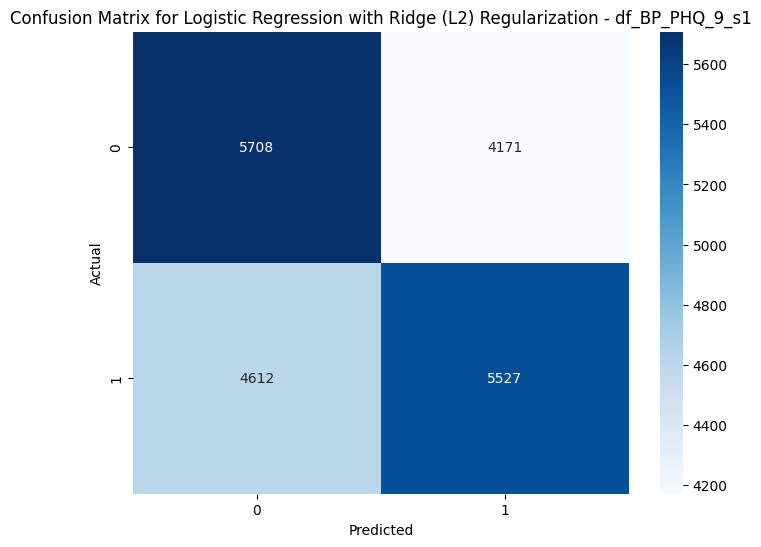

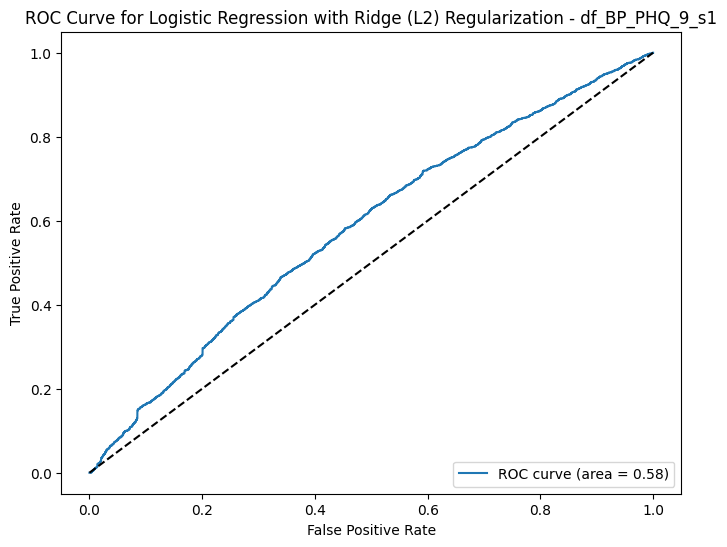

Metrics for Logistic Regression with Ridge (L2) Regularization - df_BP_PHQ_9_s2:
Confusion Matrix:
 [[   0 2267]
 [   0 5265]]
Accuracy: 0.6990175252257037
Precision: 0.6990175252257037
Recall: 1.0
F1-Score: 0.8228491052590451
AUC: 0.6709405479586336




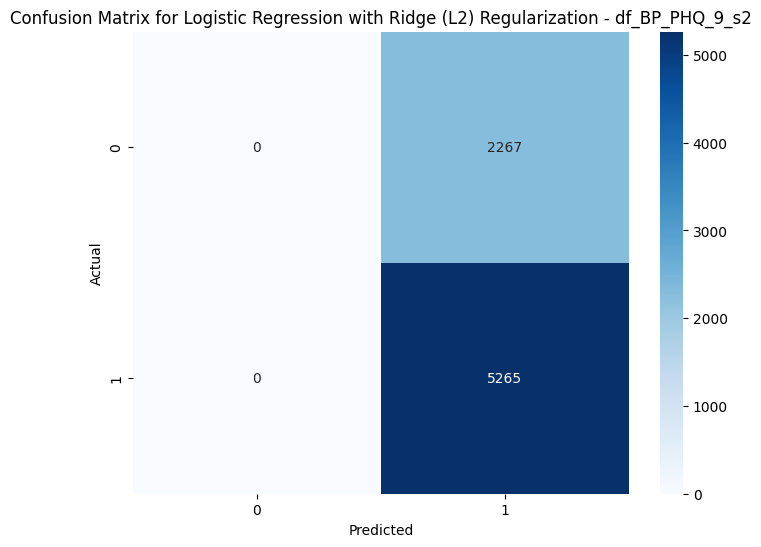

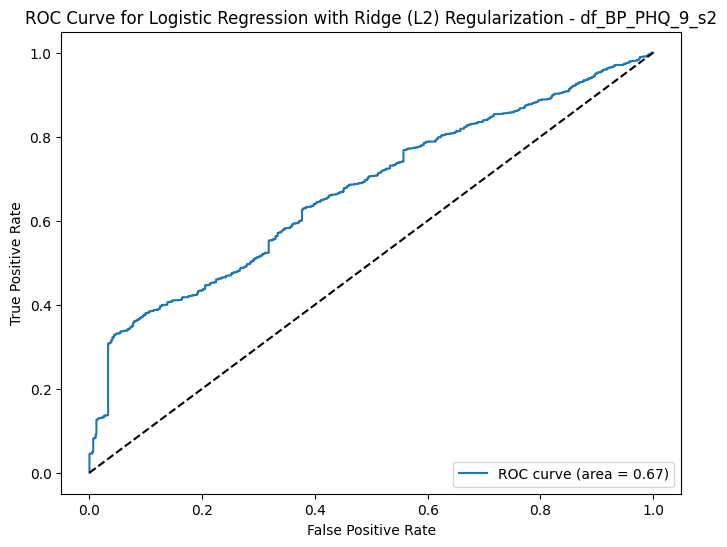

Metrics for Logistic Regression with Ridge (L2) Regularization - df_MH_PHQ_S_s1:
Confusion Matrix:
 [[17186 10874]
 [12711 14959]]
Accuracy: 0.5767988516059573
Precision: 0.579065536329501
Recall: 0.5406216118539935
F1-Score: 0.5591835971814665
AUC: 0.6001328043757749




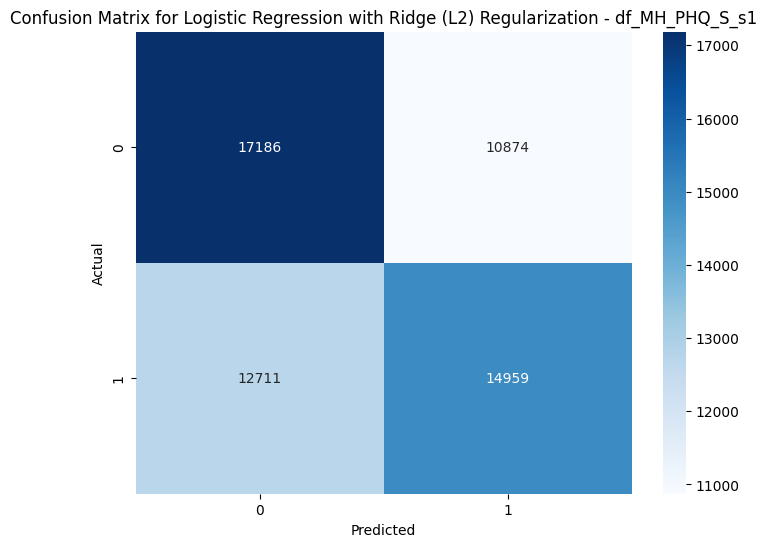

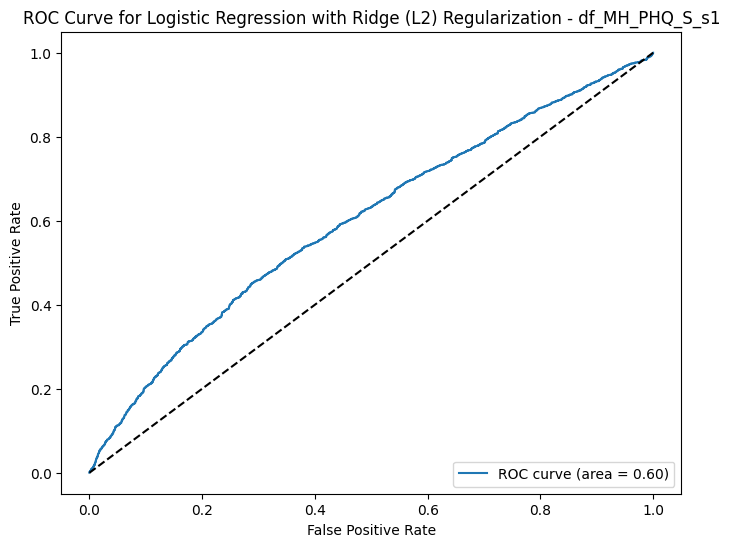

Metrics for Logistic Regression with Ridge (L2) Regularization - df_MH_PHQ_S_s2:
Confusion Matrix:
 [[ 2788 27331]
 [ 2517 42684]]
Accuracy: 0.6037174721189591
Precision: 0.6096407912590159
Recall: 0.9443153912524059
F1-Score: 0.7409387585057631
AUC: 0.6246164933491228




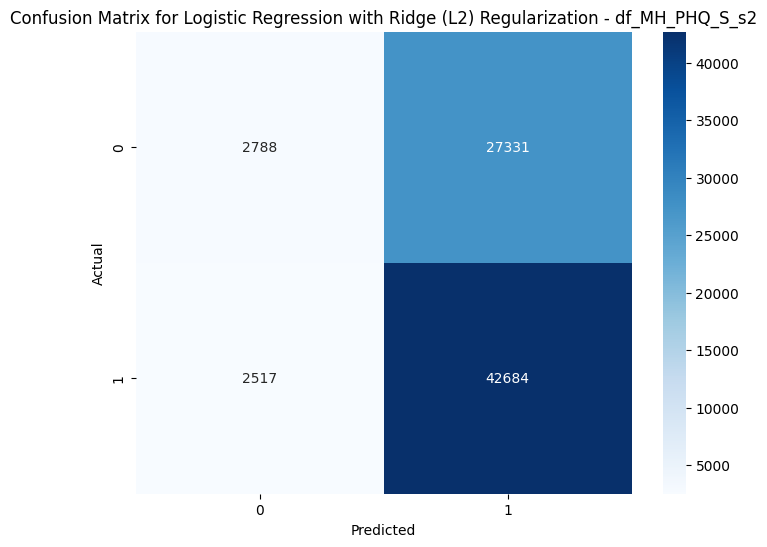

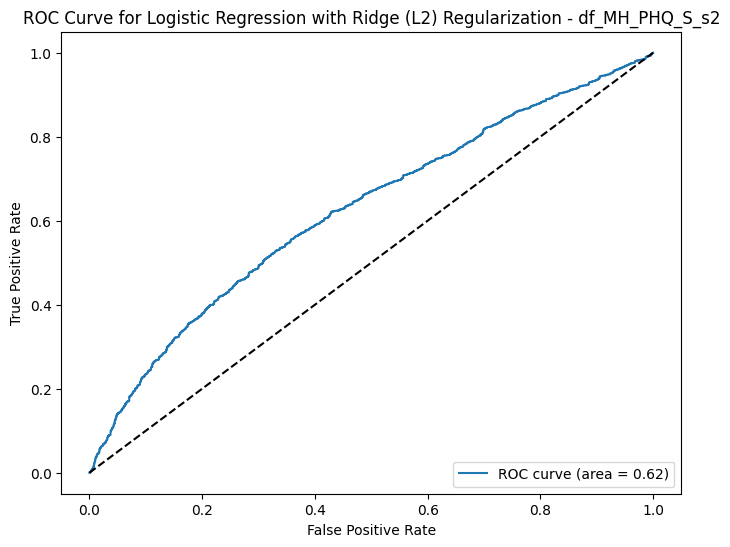

In [6]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# reminder about the 4 datasets (adapted versions)
# balanced_df_BP_PHQ_9_s1
# balanced_df_BP_PHQ_9_s2
# balanced_df_MH_PHQ_S_s1
# balanced_df_MH_PHQ_S_s2

# for later use
def print_metrics(y_test, y_pred, y_pred_proba, model_name):
    print(f"Metrics for {model_name}:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_pred_proba))
    print("\n")

    # plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # plot ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# l2 regularization
def train_logistic_regression_ridge(selected_df, model_name, max_iterations=3000, test_size=0.2):
    # for tests
    #sampled_df = selected_df.sample(n=10000, random_state=42)

    # whole dataset apllication
    sampled_df = selected_df

    # Define features and output variable
    X = sampled_df.drop(['d_PHQ', 'Depression'], axis=1)
    y = sampled_df['Depression']

    # Split into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Hyperparameter tuning for logistic regression with Ridge (L2-regularization)
    param_grid_ridge = {
        'penalty': ['l2'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
    }

    log_reg_ridge = LogisticRegression(max_iter=max_iterations)
    grid_search_ridge = GridSearchCV(log_reg_ridge, param_grid_ridge, cv=5, scoring='recall', n_jobs=-1, error_score='raise')
    grid_search_ridge.fit(X_train, y_train)

    # Find best model and evaluate it
    y_pred_ridge = grid_search_ridge.predict(X_test)
    y_pred_proba_ridge = grid_search_ridge.predict_proba(X_test)[:, 1]

    # Print metrics
    print_metrics(y_test, y_pred_ridge, y_pred_proba_ridge, f"Logistic Regression with Ridge (L2) Regularization - {model_name}")

# Train and evaluate models for each dataset with specified iterations
train_logistic_regression_ridge(balanced_df_BP_PHQ_9_s1, "df_BP_PHQ_9_s1", max_iterations=3000)
train_logistic_regression_ridge(balanced_df_BP_PHQ_9_s2, "df_BP_PHQ_9_s2", max_iterations=3000)
train_logistic_regression_ridge(balanced_df_MH_PHQ_S_s1, "df_MH_PHQ_S_s1", max_iterations=3000)
train_logistic_regression_ridge(balanced_df_MH_PHQ_S_s2, "df_MH_PHQ_S_s2", max_iterations=3000)

